<a href="https://colab.research.google.com/github/ZemelakGoraga/Data-Analytics-Capstone/blob/main/food-supply-livestock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project Topic: "Global Food Production Trends and Insights

**Description:**
This data analytics project aims to explore and analyze the FAOSTAT dataset, which encompasses a vast collection of time-series and cross-sectional data related to food and agriculture. The project will focus on understanding global food production trends by examining the production quantities of various food items across different countries and years. By leveraging this comprehensive dataset, the analysis will uncover patterns, variations, and potential factors influencing food production on a global scale. The insights gained from this analysis will contribute to informed decision-making in areas such as food security, sustainable agricultural practices, and policy formulation. Through data-driven exploration, this project seeks to shed light on the dynamics of food production and consumption, highlighting opportunities for targeted interventions and informed strategies to address challenges in the food and agriculture sector

In [5]:
# Importing datasets from Kaggle
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [2]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Aug 11 00:58 kaggle.json


In [3]:
# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
# Next

# List a given datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


global-food-agriculture-statistics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)


current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [26]:
import pandas as pd
from zipfile import ZipFile

# Specify the path to the ZIP archive and the CSV file within it
zip_file_path = "/content/global-food-agriculture-statistics.zip"
csv_file_to_read = "current_FAO/raw_files/FoodSupply_LivestockFish_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile(zip_file_path, 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')

# Display first 5 rows
print(df.head())


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [5]:
# Print the 'Item Code' and 'Value' columns
print(pesticide[['Item Code', 'Value']])

       Item Code      Value
0           1357       6.00
1           1357       6.00
2           1357       2.00
3           1357      39.00
4           1357      10.00
...          ...        ...
71530       1357  187097.19
71531       1357  163273.84
71532       1357  135071.13
71533       1357  145620.69
71534       1357  153309.58

[71535 rows x 2 columns]


In [8]:
import pandas as pd

# Display the first 10 rows
first_10_rows = df.head(10)
print(first_10_rows)


   Country Code      Country  Item Code        Item  Element Code  \
0             2  Afghanistan       1357  Pesticides          5622   
1             2  Afghanistan       1357  Pesticides          5622   
2             2  Afghanistan       1357  Pesticides          5622   
3             2  Afghanistan       1357  Pesticides          5622   
4             2  Afghanistan       1357  Pesticides          5622   
5             2  Afghanistan       1357  Pesticides          5622   
6             2  Afghanistan       1357  Pesticides          5622   
7             2  Afghanistan       1357  Pesticides          5622   
8             2  Afghanistan       1357  Pesticides          5622   
9             2  Afghanistan       1357  Pesticides          5622   

        Element  Year Code  Year      Unit  Value Flag  
0  Import Value       1971  1971  1000 US$    6.0    F  
1  Import Value       1972  1972  1000 US$    6.0    F  
2  Import Value       1973  1973  1000 US$    2.0    W  
3  Import Va

In [10]:
import pandas as pd
import numpy as np

# Identify missing values
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


In [ ]:
import pandas as pd
import numpy as np

# Identify missing values
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing Values:")
print(missing_values[missing_values > 0])

# Option 1: Imputation
# You can impute missing values using various strategies (mean, median, mode, etc.)
# Let's impute missing values in the 'Value' column with the mean
mean_value = df['Value'].mean()
df['Value'].fillna(mean_value, inplace=True)

# Option 2: Removal
# If the missing values are in a small proportion, you might consider removing rows with missing values
df_cleaned = df.dropna()

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())


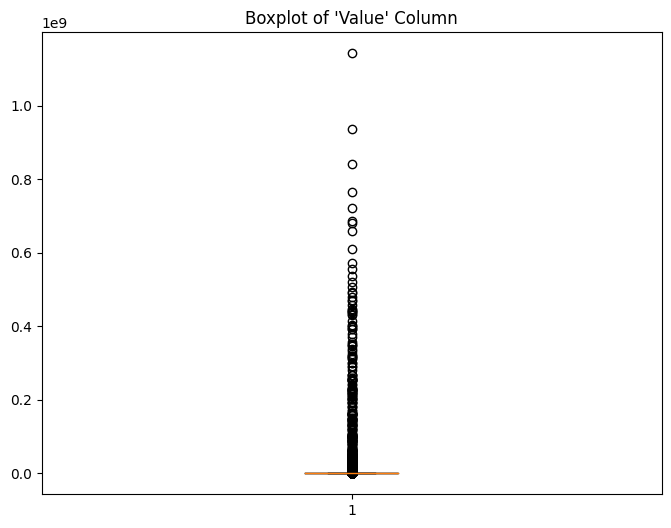

Cleaned DataFrame:
   Country Code      Country  Item Code        Item  Element Code  \
0             2  Afghanistan       1357  Pesticides          5622   
1             2  Afghanistan       1357  Pesticides          5622   
2             2  Afghanistan       1357  Pesticides          5622   
3             2  Afghanistan       1357  Pesticides          5622   
4             2  Afghanistan       1357  Pesticides          5622   

        Element  Year Code  Year      Unit  Value Flag  
0  Import Value       1971  1971  1000 US$    6.0    F  
1  Import Value       1972  1972  1000 US$    6.0    F  
2  Import Value       1973  1973  1000 US$    2.0    W  
3  Import Value       1974  1974  1000 US$   39.0    W  
4  Import Value       1975  1975  1000 US$   10.0    W  


<ipython-input-11-82b3b83b7bae>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'][outlier_indices] = median_value


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualize data distribution and identify potential outliers
# Let's say we're interested in addressing outliers in the 'Value' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Value'])
plt.title("Boxplot of 'Value' Column")
plt.show()

# Calculate z-scores to identify outliers
z_scores = np.abs((df['Value'] - df['Value'].mean()) / df['Value'].std())

# Define a threshold for identifying outliers (e.g., z-score greater than 3)
outliers_threshold = 3

# Identify outlier indices
outlier_indices = z_scores[z_scores > outliers_threshold].index

# Option 1: Remove outliers
# Remove rows with identified outliers
df_cleaned = df.drop(outlier_indices)

# Option 2: Transform outliers
# Replace outliers with a more reasonable value (e.g., using the median)
median_value = df['Value'].median()
df['Value'][outlier_indices] = median_value

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned.head())


In [17]:
import pandas as pd

# Calculate Population Growth Rate
df['Population_Growth_Rate'] = df.groupby('Country')['Value'].pct_change() * 100

# Create Decade and Year Interaction
#df['Decade_Year_Interaction'] = df['Decade'] * df['Year']

# Create Urban vs. Rural feature
#population_density_threshold = 500  # Adjust the threshold as needed
#df['Urban_Rural'] = df['Population_Density'].apply(lambda x: 'Urban' if x > population_density_threshold else 'Rural')

# Create Population Density Category
#density_bins = [0, 100, 500, float('inf')]
#density_labels = ['Low', 'Medium', 'High']
#df['Population_Density_Category'] = pd.cut(df['Population_Density'], bins=density_bins, labels=density_labels)

# Calculate Historical Trend
historical_period = 10  # Consider the last 10 years for example
df['Average_Population_Growth_Last_10_Years'] = df.groupby('Country')['Population_Growth_Rate'].rolling(historical_period, min_periods=1).mean().reset_index(0, drop=True)

# Display the first few rows of the DataFrame with new features
print("DataFrame with New Features:")
print(df.head())


DataFrame with New Features:
   Country Code      Country  Item Code        Item  Element Code  \
0             2  Afghanistan       1357  Pesticides          5622   
1             2  Afghanistan       1357  Pesticides          5622   
2             2  Afghanistan       1357  Pesticides          5622   
3             2  Afghanistan       1357  Pesticides          5622   
4             2  Afghanistan       1357  Pesticides          5622   

        Element  Year Code  Year      Unit  Value Flag  Standardized_Value  \
0  Import Value       1971  1971  1000 US$    6.0    F           -0.109379   
1  Import Value       1972  1972  1000 US$    6.0    F           -0.109379   
2  Import Value       1973  1973  1000 US$    2.0    W           -0.109382   
3  Import Value       1974  1974  1000 US$   39.0    W           -0.109358   
4  Import Value       1975  1975  1000 US$   10.0    W           -0.109377   

   Normalized_Value  Population_Growth_Rate  \
0      1.313111e-07                     

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Let's say we want to standardize the 'Value' column
values_to_standardize = df[['Value']]

# Standardization
scaler = StandardScaler()
standardized_values = scaler.fit_transform(values_to_standardize)
df['Standardized_Value'] = standardized_values

# Let's also say we want to normalize the 'Value' column using Min-Max scaling
values_to_normalize = df[['Value']]

# Min-Max Scaling (Normalization)
minmax_scaler = MinMaxScaler()
normalized_values = minmax_scaler.fit_transform(values_to_normalize)
df['Normalized_Value'] = normalized_values

# Display the first few rows of the DataFrame with standardized and normalized columns
print("DataFrame with Standardized and Normalized Columns:")
print(df.head())


DataFrame with Standardized and Normalized Columns:
   Country Code      Country  Item Code        Item  Element Code  \
0             2  Afghanistan       1357  Pesticides          5622   
1             2  Afghanistan       1357  Pesticides          5622   
2             2  Afghanistan       1357  Pesticides          5622   
3             2  Afghanistan       1357  Pesticides          5622   
4             2  Afghanistan       1357  Pesticides          5622   

        Element  Year Code  Year      Unit  Value Flag  Standardized_Value  \
0  Import Value       1971  1971  1000 US$    6.0    F           -0.109379   
1  Import Value       1972  1972  1000 US$    6.0    F           -0.109379   
2  Import Value       1973  1973  1000 US$    2.0    W           -0.109382   
3  Import Value       1974  1974  1000 US$   39.0    W           -0.109358   
4  Import Value       1975  1975  1000 US$   10.0    W           -0.109377   

   Normalized_Value  
0      1.313111e-07  
1      1.313111e-07 

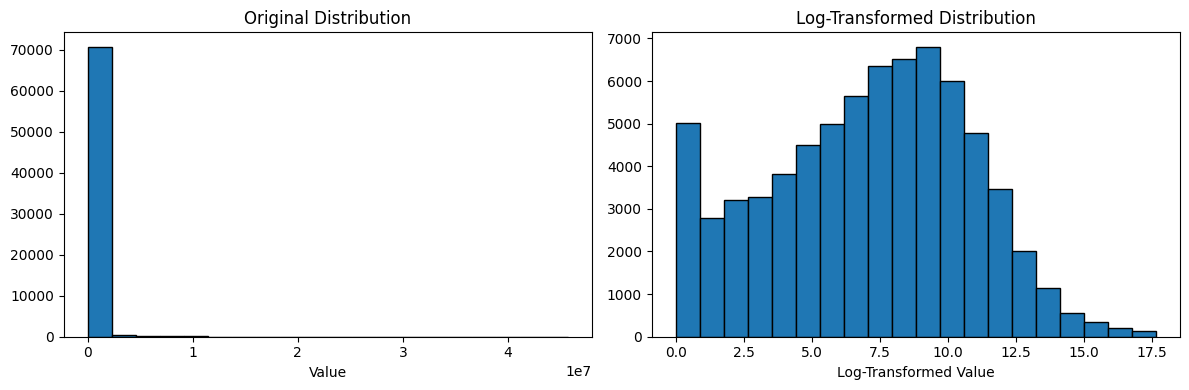

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example skewed numerical column: 'Value'
skewed_column = 'Value'

# Visualize the original distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df[skewed_column], bins=20, edgecolor='black')
plt.title('Original Distribution')
plt.xlabel(skewed_column)

# Apply Log Transformation
df['Log_Transformed_Value'] = np.log1p(df[skewed_column])

# Visualize the log-transformed distribution
plt.subplot(1, 2, 2)
plt.hist(df['Log_Transformed_Value'], bins=20, edgecolor='black')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log-Transformed ' + skewed_column)
plt.tight_layout()
plt.show()


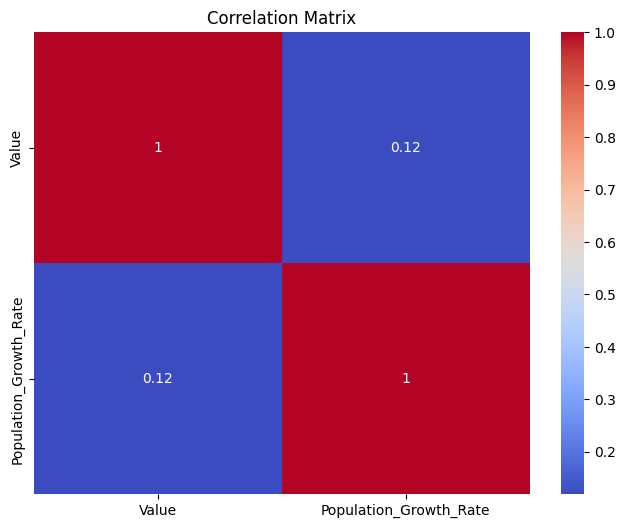

In [26]:
import pandas as pd
import numpy as np

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example features for multicollinearity check
features_for_multicollinearity = ['Value', 'Population_Growth_Rate']

# Calculate the correlation matrix
correlation_matrix = df[features_for_multicollinearity].corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# initial data profiling
# Display the shape of the DataFrame (number of rows and columns)
print("\nDataFrame shape:")
print(df.shape)

# Display basic information about the DataFrame
print("\nDataFrame info:")
print(df.info())

# Display basic summary statistics of numeric columns
print("\nSummary statistics:")
print(df.describe())



DataFrame shape:
(2459791, 11)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459791 entries, 0 to 2459790
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 206.4+ MB
None

Summary statistics:
          Area Code     Item Code  Element Code     Year Code          Year  \
count  2.459791e+06  2.459791e+06  2.459791e+06  2.459791e+06  2.459791e+06   
mean   1.251979e+03  2.798769e+03  5.405312e+03  1.987730e+03  1.987730e+03   
std    2.162616e+03  8.306858e+01  2.705903e+02  1.535588e+01  1.535588e+01   
min    1.000000e+00  2.731000e+03  5.071000e+03  1.961000e+03  1.961000e+03   
25

In [29]:
import pandas as pd

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example categorical column: 'Country'
categorical_column = 'Country'

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(df[categorical_column], prefix=categorical_column)
df_one_hot = pd.concat([df, one_hot_encoded], axis=1)

# Label Encoding
df_label = df.copy()
df_label[categorical_column] = df_label[categorical_column].astype('category').cat.codes

# Display the first few rows of the DataFrames with encoded columns
print("DataFrame with One-Hot Encoding:")
print(df_one_hot.head())

print("\nDataFrame with Label Encoding:")
print(df_label.head())


DataFrame with One-Hot Encoding:
   Country Code      Country  Item Code        Item  Element Code  \
0             2  Afghanistan       1357  Pesticides          5622   
1             2  Afghanistan       1357  Pesticides          5622   
2             2  Afghanistan       1357  Pesticides          5622   
3             2  Afghanistan       1357  Pesticides          5622   
4             2  Afghanistan       1357  Pesticides          5622   

        Element  Year Code  Year      Unit  Value  ... Country_Viet Nam  \
0  Import Value       1971  1971  1000 US$    6.0  ...                0   
1  Import Value       1972  1972  1000 US$    6.0  ...                0   
2  Import Value       1973  1973  1000 US$    2.0  ...                0   
3  Import Value       1974  1974  1000 US$   39.0  ...                0   
4  Import Value       1975  1975  1000 US$   10.0  ...                0   

   Country_Wallis and Futuna Islands  Country_Western Africa  \
0                                  0 

In [30]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example target column: 'Value'
target_column = 'Value'

# Calculate class distribution
class_distribution = df[target_column].value_counts()
print("Class Distribution:")
print(class_distribution)

# Identify the minority and majority classes (you can adjust this based on your scenario)
minority_class = df[df[target_column] == 'minority_class_value']
majority_class = df[df[target_column] == 'majority_class_value']

# Upsample the minority class (for classification)
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
df_balanced = pd.concat([majority_class, minority_upsampled])

# Shuffle the data to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Now you have a balanced dataset for classification with 'Value' as the target


Class Distribution:
1.00         869
2.00         484
3.00         337
5.00         287
4.00         284
            ... 
342.23         1
14415.00       1
38905.00       1
32.07          1
153309.58      1
Name: Value, Length: 40219, dtype: int64


In [31]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example target column: 'Value'
target_column = 'Value'

# Calculate class distribution
class_distribution = df[target_column].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1.00         869
2.00         484
3.00         337
5.00         287
4.00         284
            ... 
342.23         1
14415.00       1
38905.00       1
32.07          1
153309.58      1
Name: Value, Length: 40219, dtype: int64


In [34]:
# Identify the minority and majority classes (you can adjust this based on your scenario)
minority_class = df[df[target_column] == 'minority_class_value']
majority_class = df[df[target_column] == 'majority_class_value']

In [ ]:
8.2. Split the dataset into training, validation, and test sets to evaluate model performance.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Split the dataset into features (X) and target (y)
X = df[['Value']]  # Features: 'Value' column
y = df['Value']    # Target: 'Value' column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of training and test sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (57228, 1) (57228,)
Test set shapes: (14307, 1) (14307,)


In [39]:
import pandas as pd

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example numerical column: 'Value'
numerical_column = 'Value'

# Calculate mean, median, and standard deviation
mean_value = df[numerical_column].mean()
median_value = df[numerical_column].median()
std_value = df[numerical_column].std()

print(f"Mean {numerical_column}: {mean_value:.2f}")
print(f"Median {numerical_column}: {median_value:.2f}")
print(f"Standard Deviation {numerical_column}: {std_value:.2f}")


Mean Value: 166055.39
Median Value: 1694.65
Standard Deviation Value: 1518113.96


In [40]:
import pandas as pd

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example categorical column: 'Country'
categorical_column = 'Country'

# Generate frequency table
frequency_table = df[categorical_column].value_counts()

# Calculate mode (most common category)
mode_value = df[categorical_column].mode()[0]

print("Frequency Table:")
print(frequency_table)

print("\nMode:", mode_value)


Frequency Table:
Germany                      994
United Kingdom               976
France                       930
Italy                        928
Netherlands                  911
                            ... 
Sudan                         18
Eritrea                       17
Saint Pierre and Miquelon     17
Tajikistan                    15
Tuvalu                         4
Name: Country, Length: 255, dtype: int64

Mode: Germany


In [37]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example target column: 'Value'
target_column = 'Value'

# Calculate class distribution
class_distribution = df[target_column].value_counts()
print("Class Distribution:")
print(class_distribution)

# Identify the minority and majority classes (you can adjust this based on your scenario)
minority_class = df[df[target_column] == 'minority_class_value']
majority_class = df[df[target_column] == 'majority_class_value']

# Upsample the minority class (for classification)
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
df_balanced = pd.concat([majority_class, minority_upsampled])

# Shuffle the data to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Now you have a balanced dataset for classification with 'Value' as the target


Class Distribution:
1.00         869
2.00         484
3.00         337
5.00         287
4.00         284
            ... 
342.23         1
14415.00       1
38905.00       1
32.07          1
153309.58      1
Name: Value, Length: 40219, dtype: int64


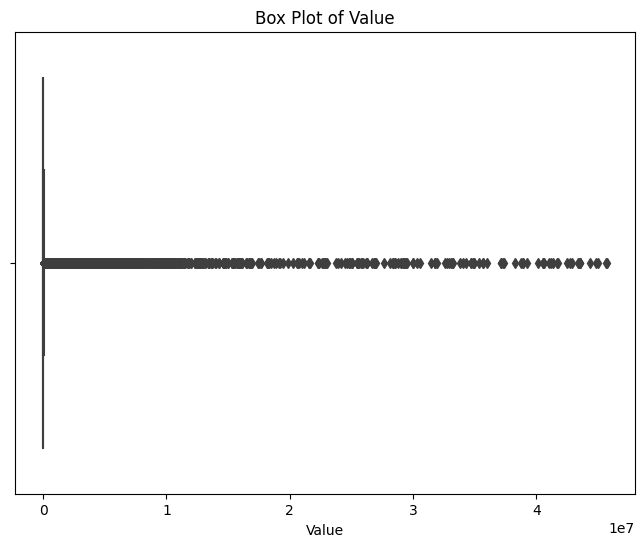

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example numerical column: 'Value'
numerical_column = 'Value'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[numerical_column])
plt.title(f'Box Plot of {numerical_column}')
plt.show()


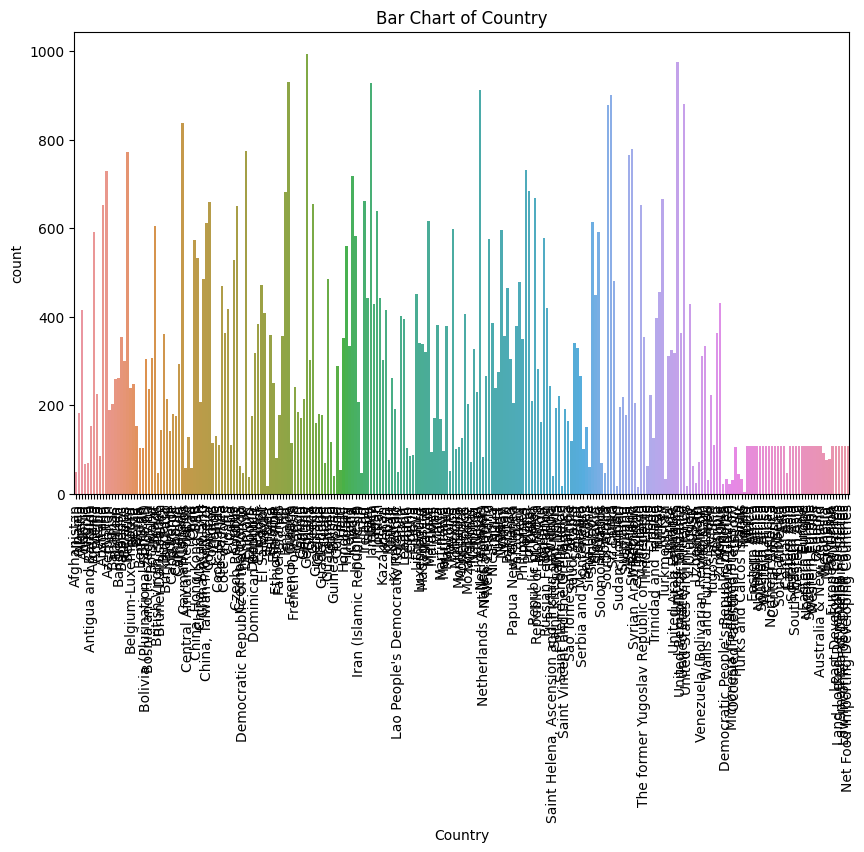

In [42]:
# Example categorical column: 'Country'
categorical_column = 'Country'

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=df)
plt.xticks(rotation=90)
plt.title(f'Bar Chart of {categorical_column}')
plt.show()


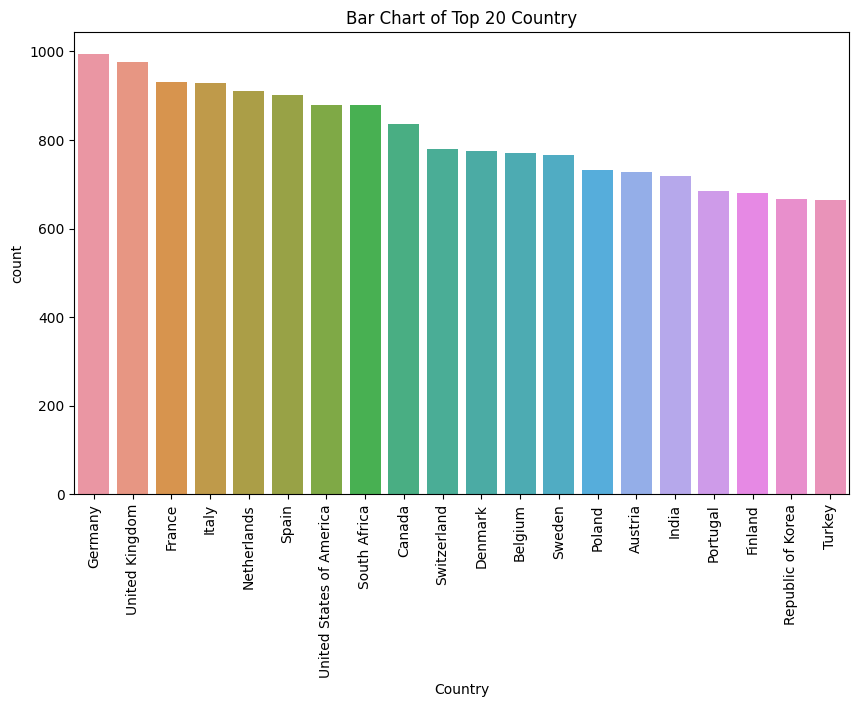

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example categorical column: 'Country'
categorical_column = 'Country'

# Calculate the top 20 countries based on frequency
top_countries = df[categorical_column].value_counts().head(20).index

# Create a subset of the DataFrame with only the top 20 countries
df_top_countries = df[df[categorical_column].isin(top_countries)]

# Create a bar chart for the top 20 countries
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=df_top_countries, order=top_countries)
plt.xticks(rotation=90)
plt.title(f'Bar Chart of Top 20 {categorical_column}')
plt.show()


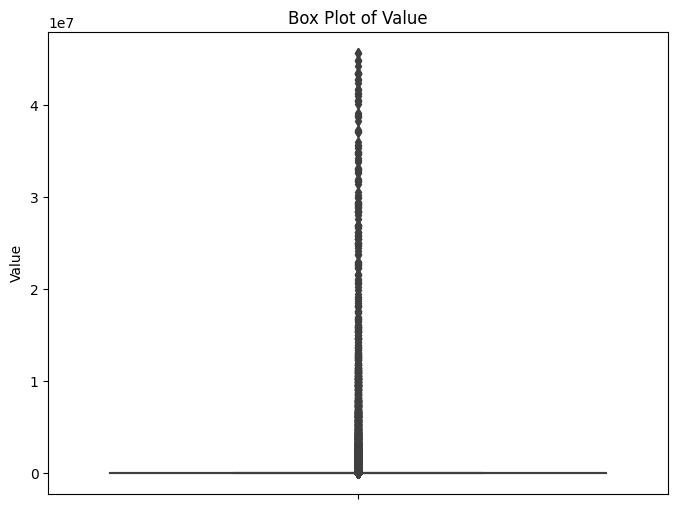

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example numerical column: 'Value'
numerical_column = 'Value'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=numerical_column, data=df)
plt.title(f'Box Plot of {numerical_column}')
plt.ylabel(numerical_column)
plt.show()


In [ ]:
# Examine data types, missing values, and potential data quality issues

# Display data types of columns
print("Data types of columns:")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)

# Check for potential data quality issues or inconsistencies
# For example, you can check for negative values in columns where they shouldn't exist
negative_values_columns = ['Value']  # Adjust with relevant columns
negative_values = df[negative_values_columns][df[negative_values_columns] < 0]
if not negative_values.empty:
    print("\nPotential data quality issues - Negative values:")
    print(negative_values)

Data types of columns:
Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

Missing values in each column:
Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Year Code       0
Year            0
Unit            0
Value           0
Flag            0
dtype: int64

Unique values in 'Area':
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize'
 'Benin' 'Bermuda' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'C

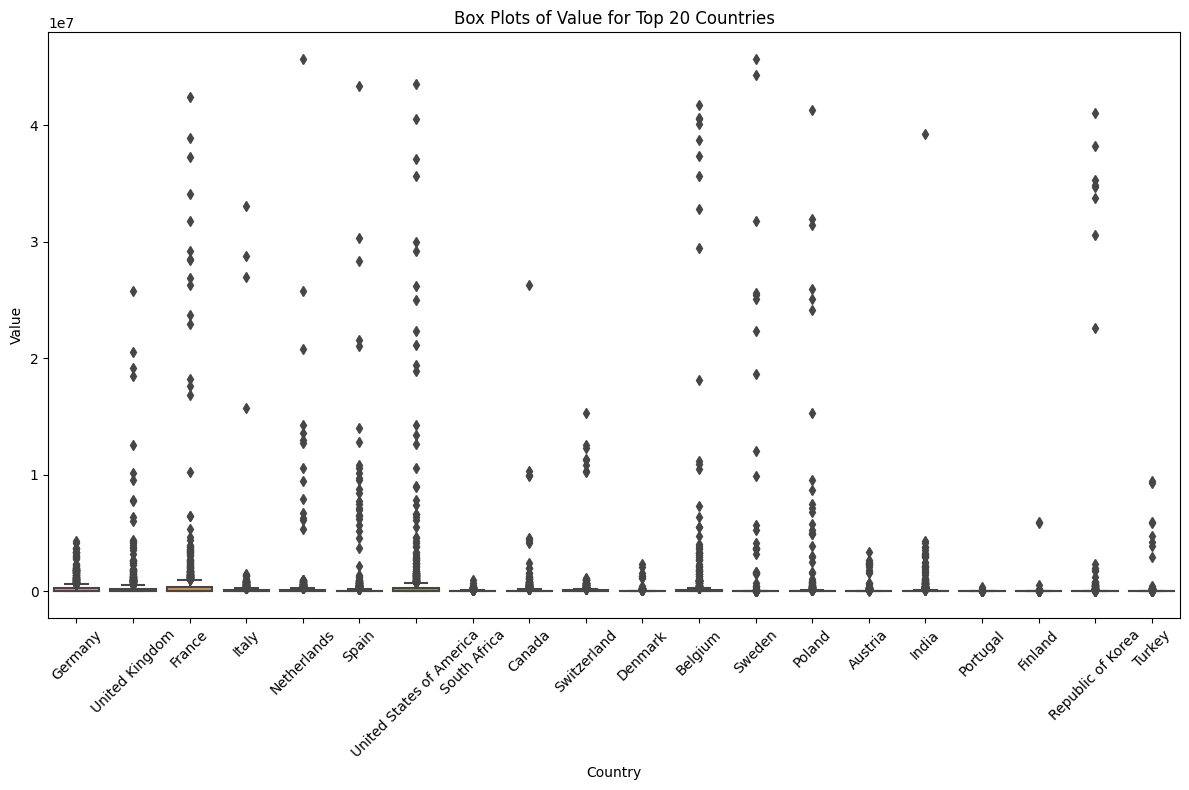

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example numerical column: 'Value'
numerical_column = 'Value'

# Example categorical column: 'Country'
categorical_column = 'Country'

# Calculate the top 20 countries based on frequency
top_countries = df[categorical_column].value_counts().head(20).index

# Create a subset of the DataFrame with only the top 20 countries
df_top_countries = df[df[categorical_column].isin(top_countries)]

# Create a box plot for the top 20 countries
plt.figure(figsize=(12, 8))
sns.boxplot(x=categorical_column, y=numerical_column, data=df_top_countries, order=top_countries)
plt.xticks(rotation=45)
plt.title(f'Box Plots of {numerical_column} for Top 20 Countries')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate summary statistics for numeric columns
summary_stats = df.describe(include='all')
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
           Area Code     Area     Item Code                     Item  \
count   2.459791e+06  2459791  2.459791e+06                  2459791   
unique           NaN      216           NaN                       38   
top              NaN    World           NaN  Milk - Excluding Butter   
freq             NaN    19049           NaN                   173274   
mean    1.251979e+03      NaN  2.798769e+03                      NaN   
std     2.162616e+03      NaN  8.306858e+01                      NaN   
min     1.000000e+00      NaN  2.731000e+03                      NaN   
25%     7.900000e+01      NaN  2.740000e+03                      NaN   
50%     1.510000e+02      NaN  2.762000e+03                      NaN   
75%     2.340000e+02      NaN  2.848000e+03                      NaN   
max     5.817000e+03      NaN  2.961000e+03                      NaN   

        Element Code                   Element     Year Code          Year  \
count   2.459791e+06                 

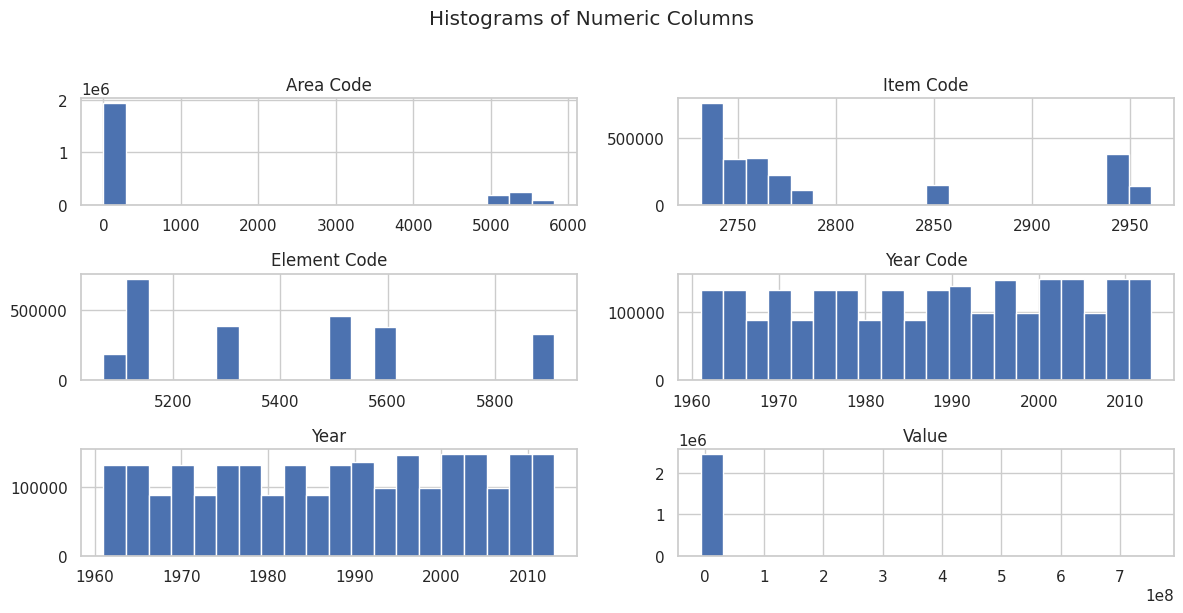

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualizations
sns.set(style="whitegrid")

# Generate histograms for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(bins=20, figsize=(12, 6))
plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()




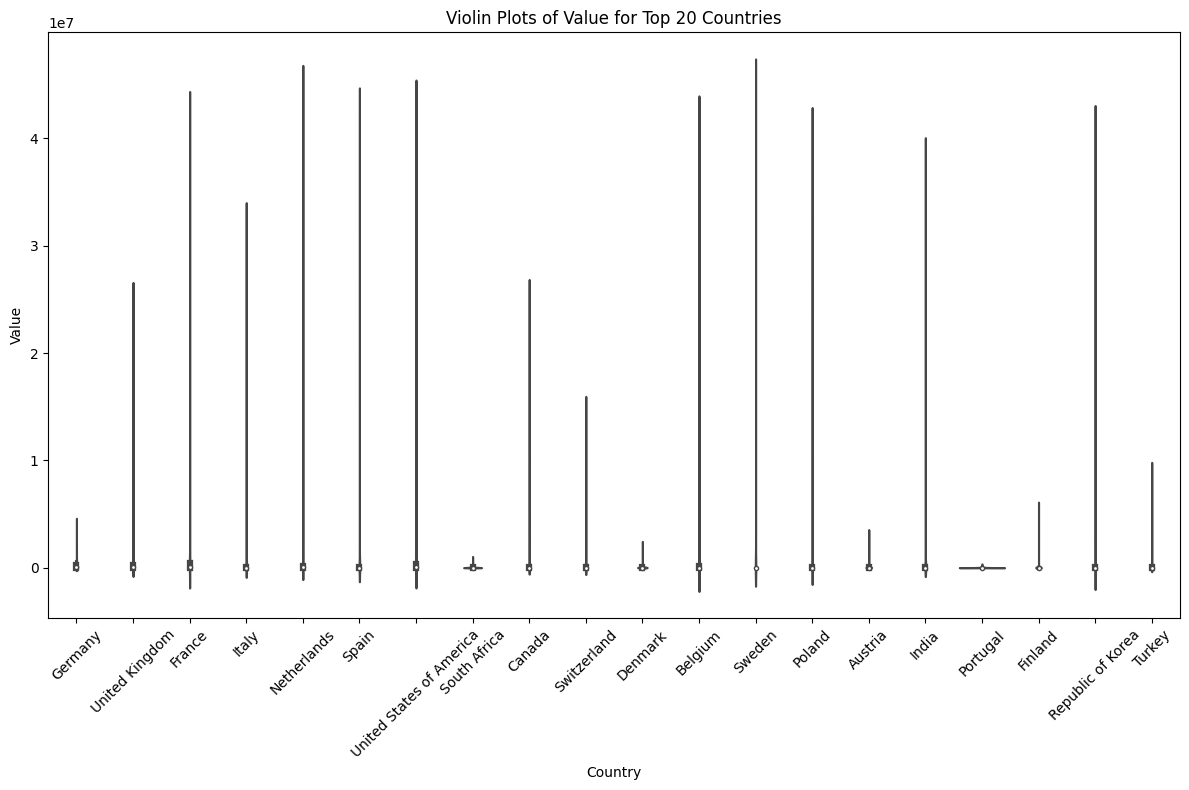

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Example numerical column: 'Value'
numerical_column = 'Value'

# Example categorical column: 'Country'
categorical_column = 'Country'

# Calculate the top 20 countries based on frequency
top_countries = df[categorical_column].value_counts().head(20).index

# Create a subset of the DataFrame with only the top 20 countries
df_top_countries = df[df[categorical_column].isin(top_countries)]

# Create a violin plot for the top 20 countries
plt.figure(figsize=(12, 8))
sns.violinplot(x=categorical_column, y=numerical_column, data=df_top_countries, order=top_countries)
plt.xticks(rotation=45)
plt.title(f'Violin Plots of {numerical_column} for Top 20 Countries')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.tight_layout()
plt.show()


In [ ]:
# Generate scatter plots for numeric columns
scatter_columns = ['Year', 'Value']  # Replace with relevant column names
sns.pairplot(df[scatter_columns])
plt.suptitle("Scatter Plots of Year vs. Value", y=1.02)
plt.tight_layout()
plt.show()


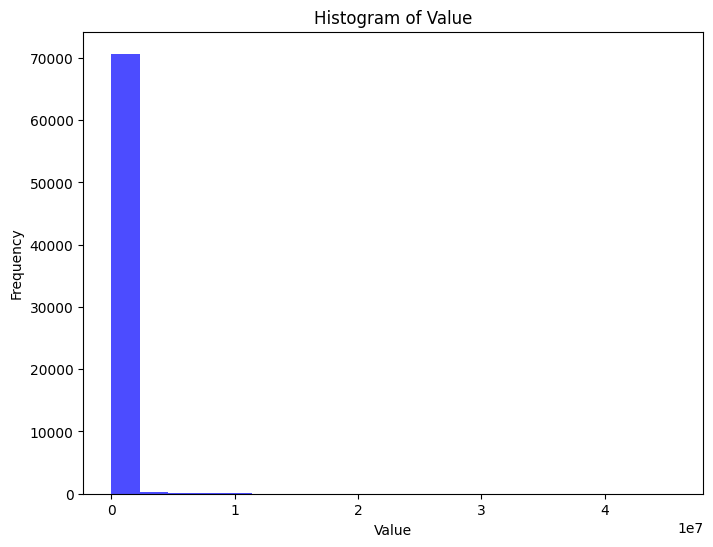

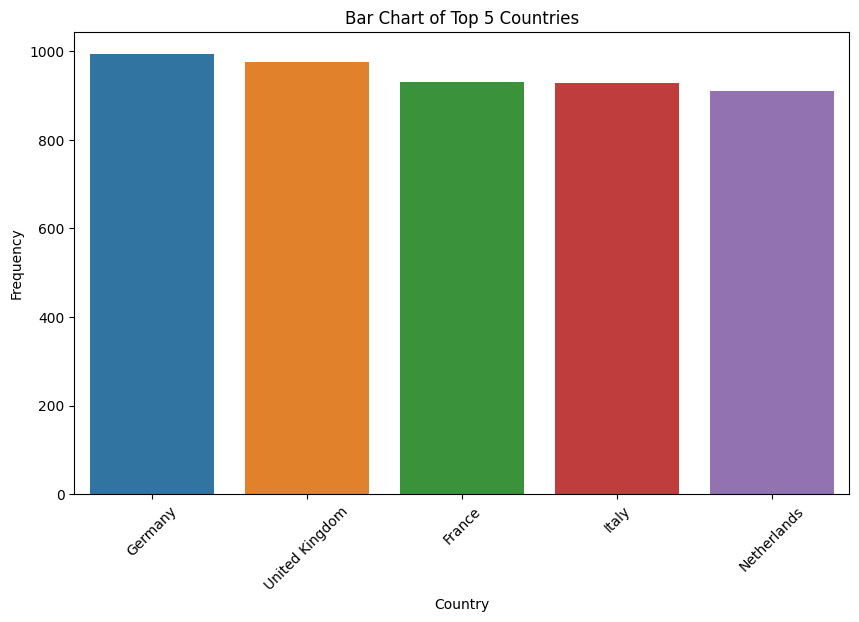

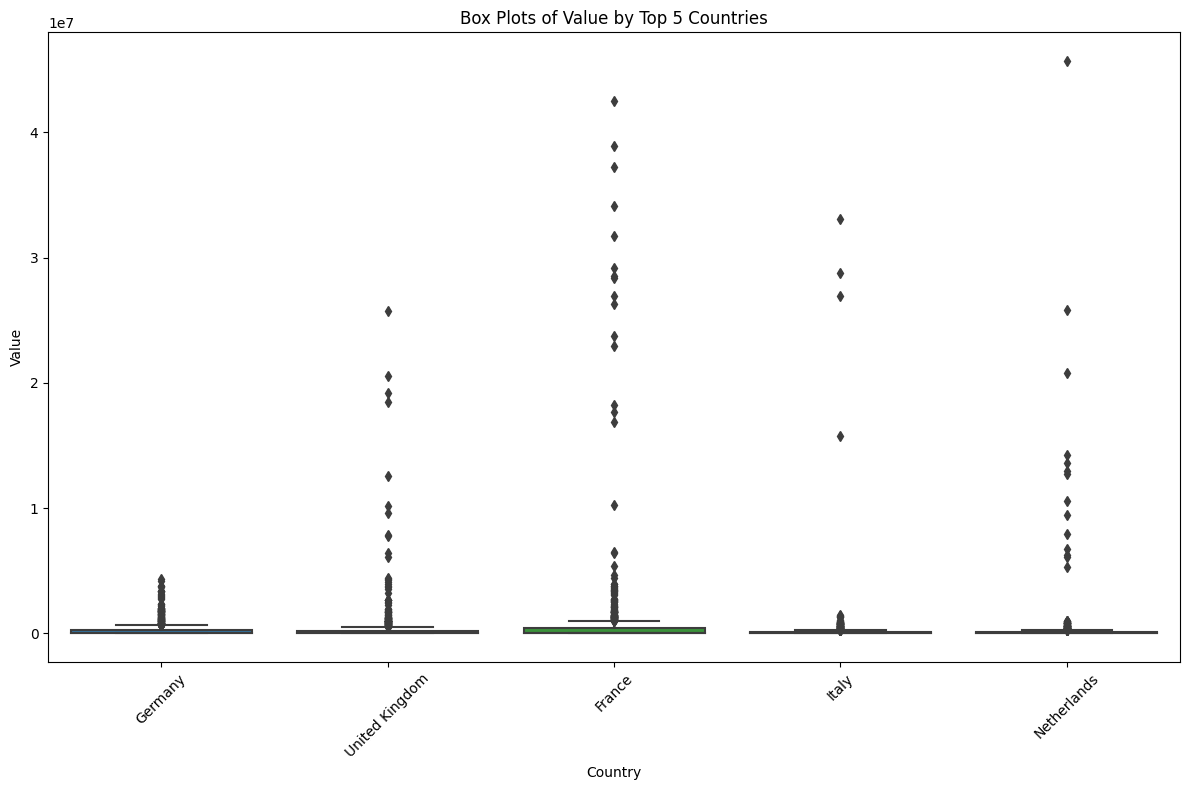

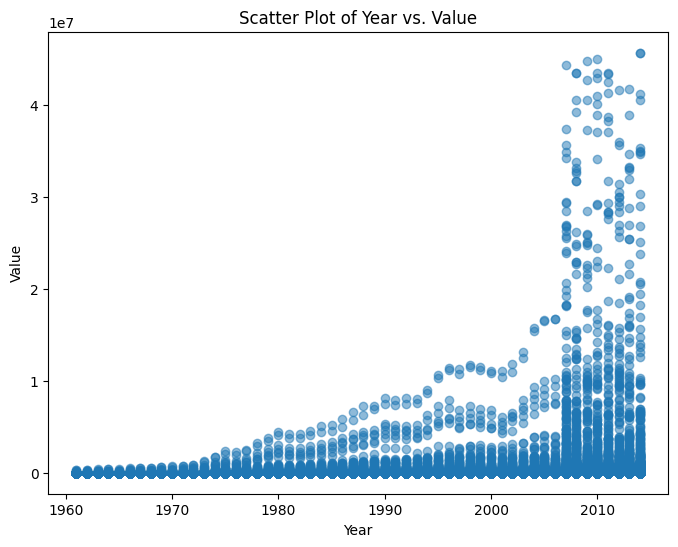

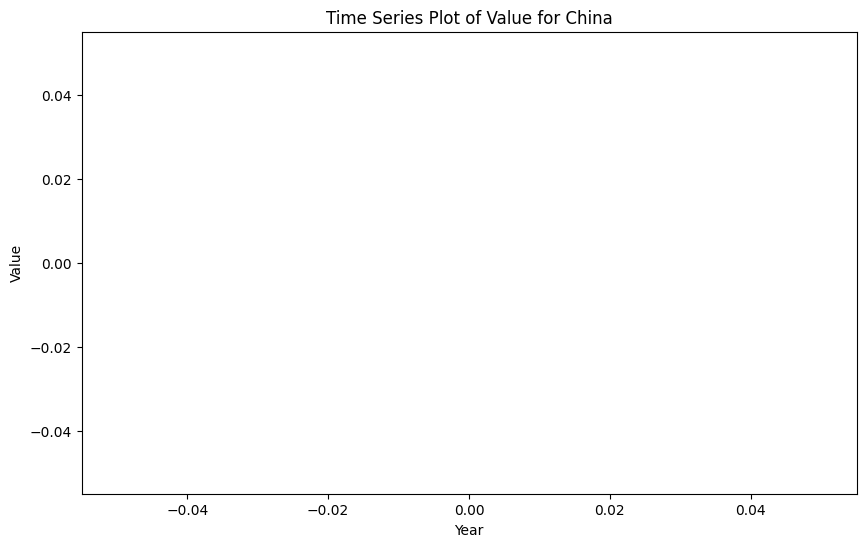

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Value'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Bar chart for categorical variable (e.g., Country)
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index[:5])
plt.xticks(rotation=45)
plt.title('Bar Chart of Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

# Box plots by Country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Value', data=df, order=df['Country'].value_counts().index[:5])
plt.xticks(rotation=45)
plt.title('Box Plots of Value by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Value'], alpha=0.5)
plt.title('Scatter Plot of Year vs. Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

# Time series plot for a specific country (e.g., China)
china_data = df[df['Country'] == 'China']
plt.figure(figsize=(10, 6))
plt.plot(china_data['Year'], china_data['Value'], marker='o')
plt.title('Time Series Plot of Value for China')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


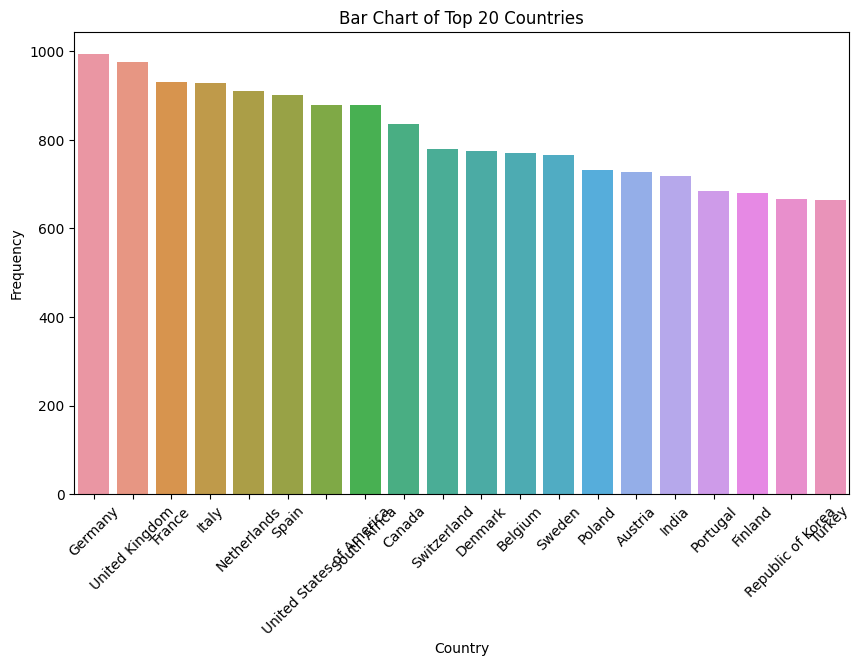

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


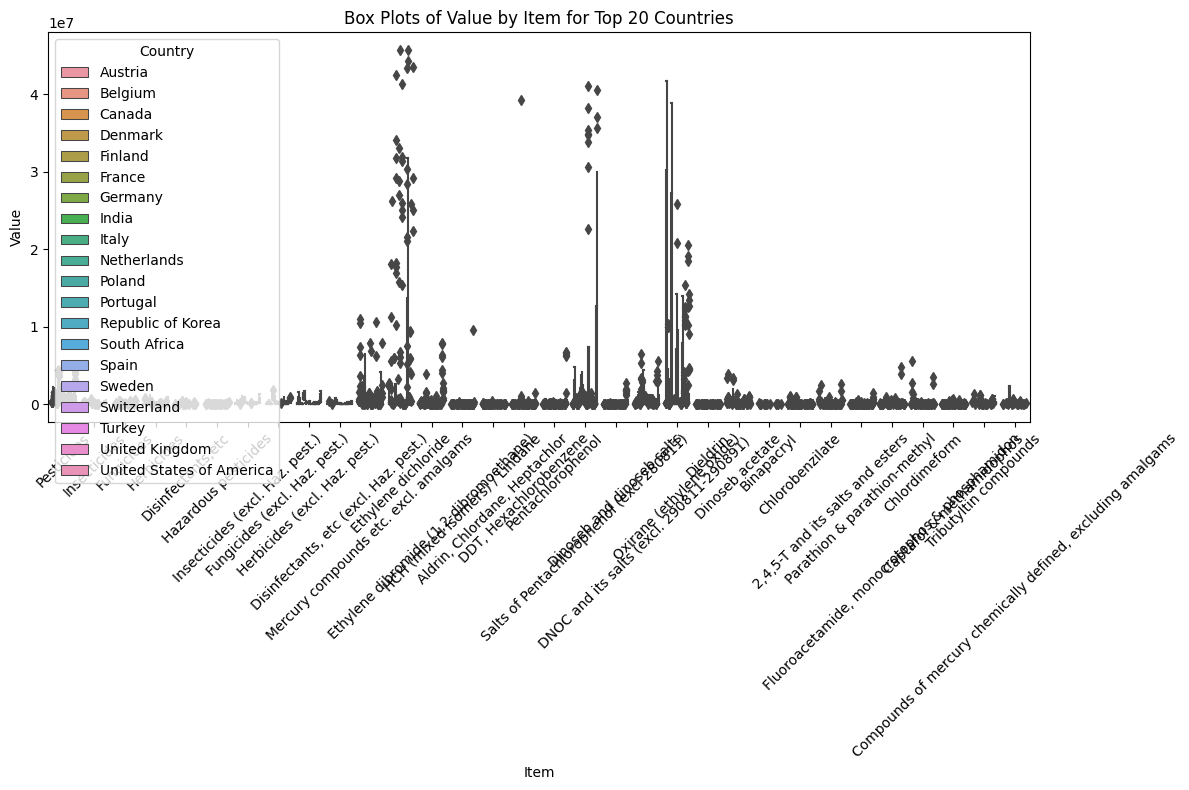

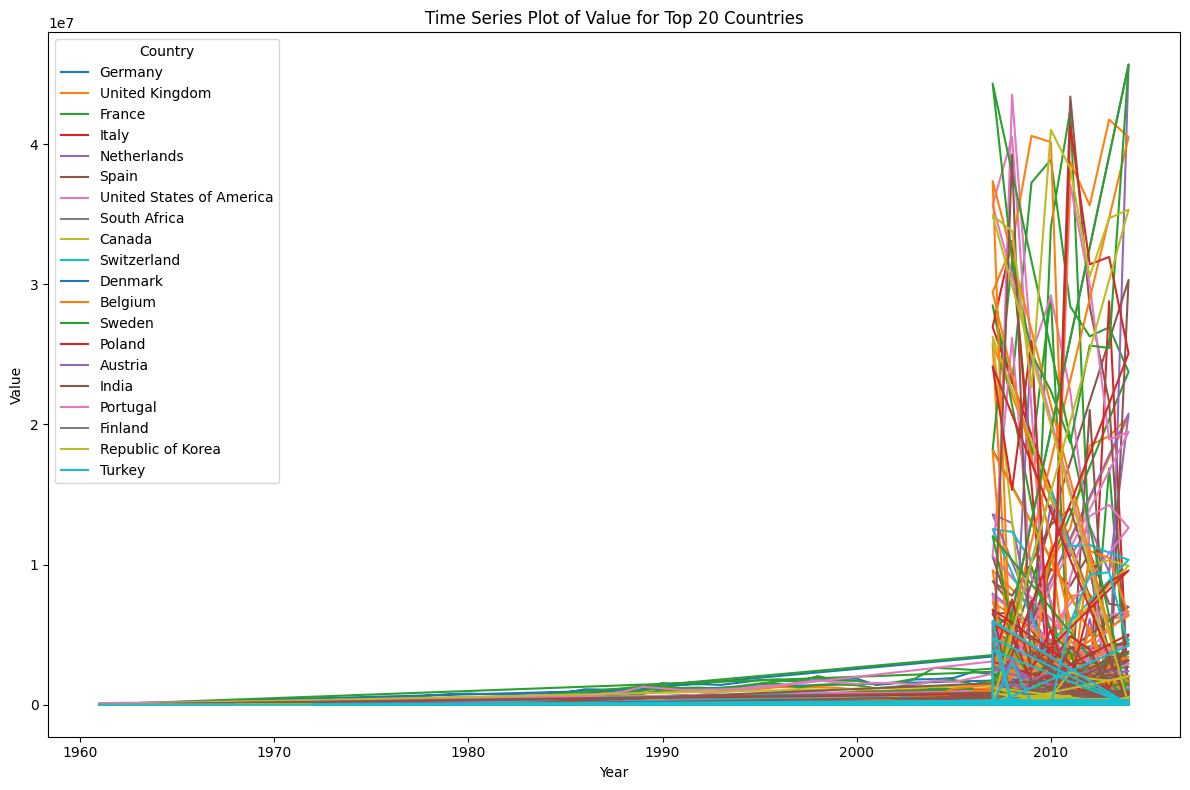

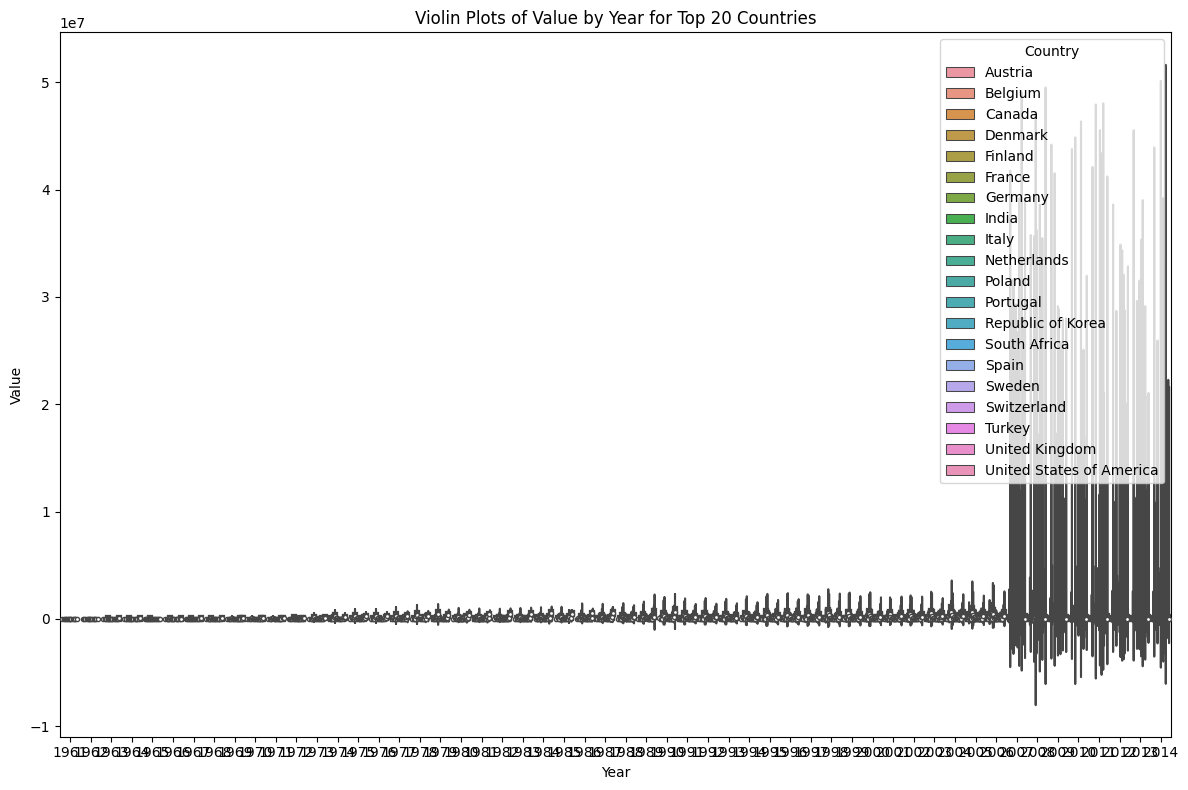

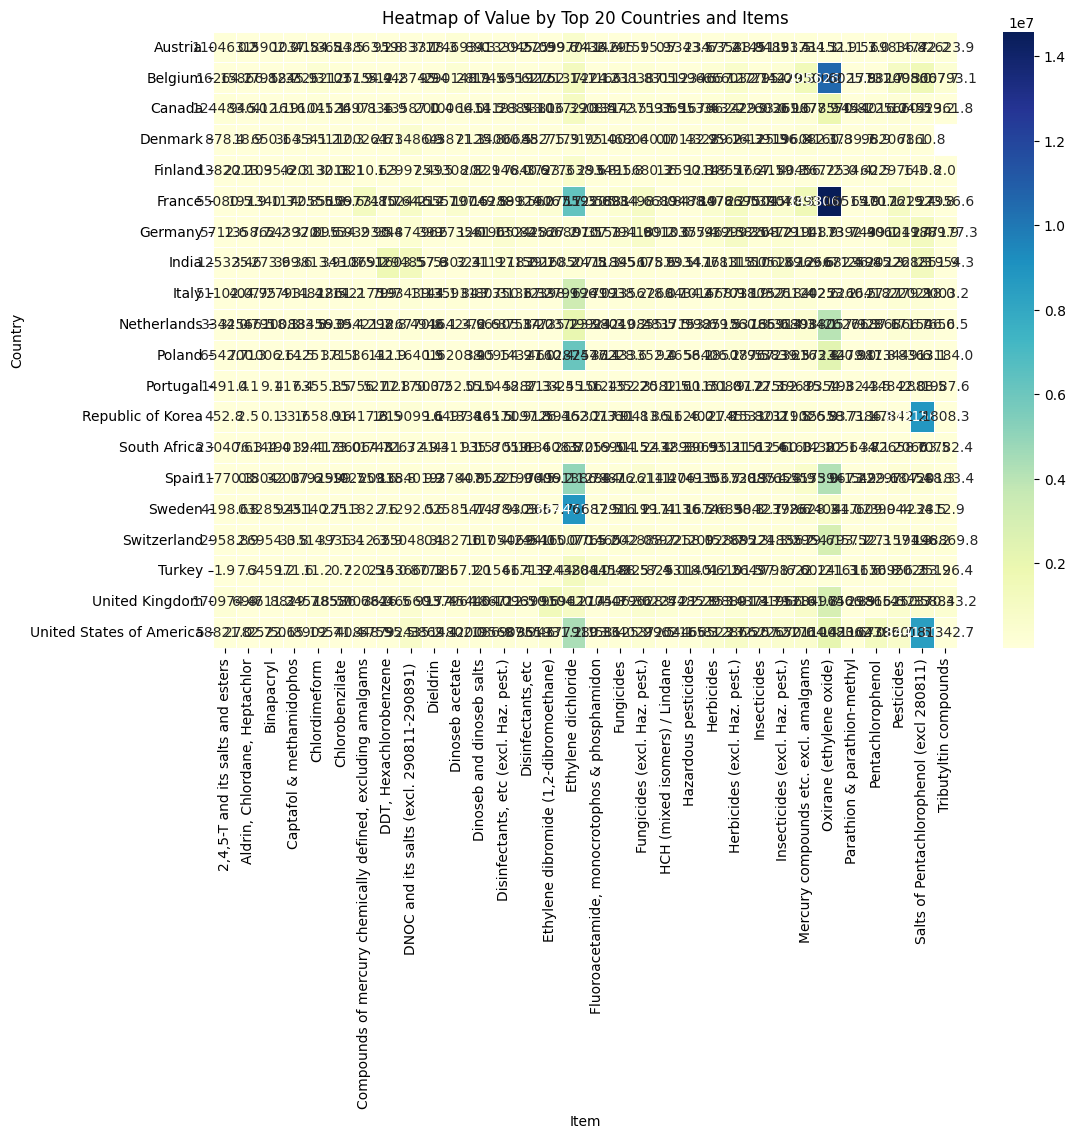

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Calculate the top 20 countries based on frequency
top_countries = df['Country'].value_counts().head(20).index

# Subset the DataFrame for top 20 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Bar chart of top 20 countries
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df_top_countries, order=top_countries)
plt.xticks(rotation=45)
plt.title('Bar Chart of Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

# Box plots by Item for top 20 countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='Item', y='Value', data=df_top_countries, hue='Country')
plt.xticks(rotation=45)
plt.title('Box Plots of Value by Item for Top 20 Countries')
plt.xlabel('Item')
plt.ylabel('Value')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Time series plots for top 20 countries
plt.figure(figsize=(12, 8))
for country in top_countries:
    country_data = df_top_countries[df_top_countries['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)
plt.title('Time Series Plot of Value for Top 20 Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Violin plots by Year for top 20 countries
plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Value', data=df_top_countries, hue='Country')
plt.title('Violin Plots of Value by Year for Top 20 Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Heatmap of Value by top 20 countries and items
pivot_table = df_top_countries.pivot_table(values='Value', index='Country', columns='Item')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Value by Top 20 Countries and Items')
plt.xlabel('Item')
plt.ylabel('Country')
plt.show()


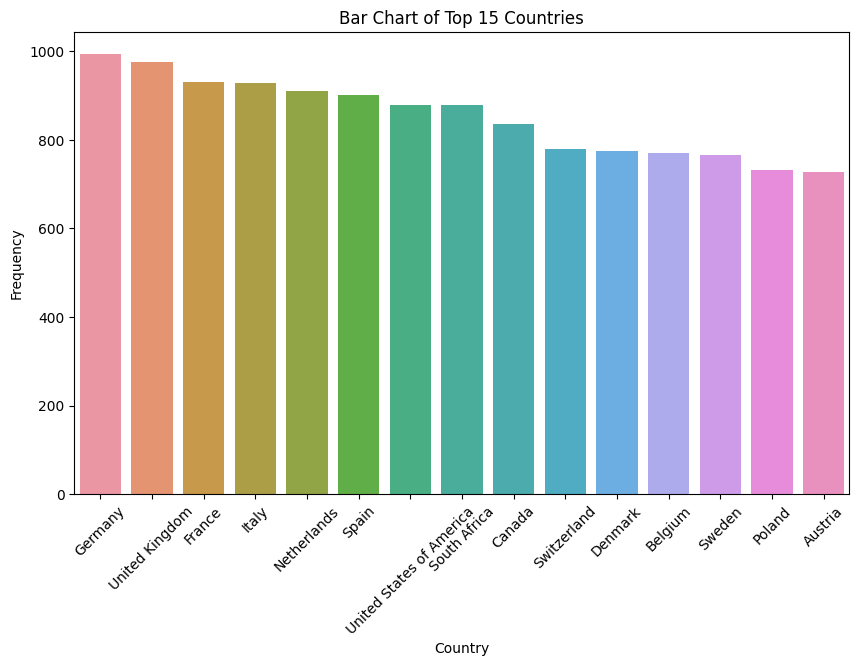

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


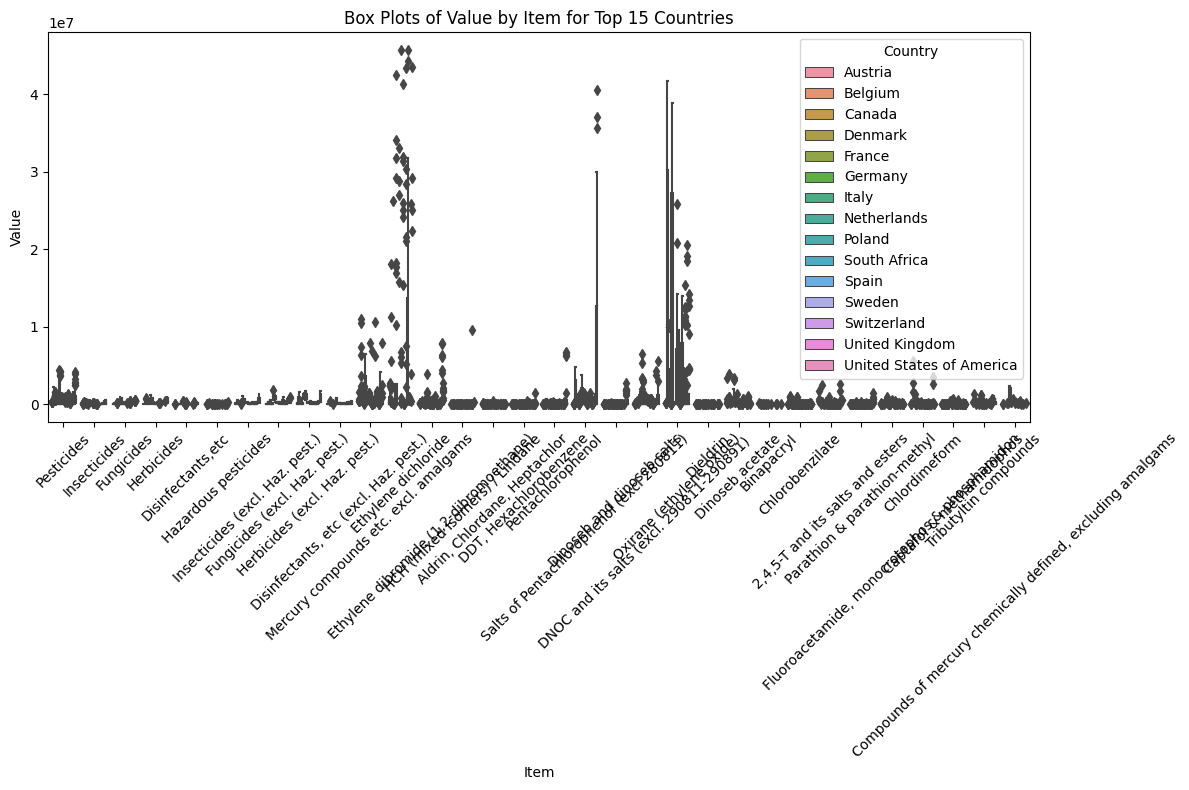

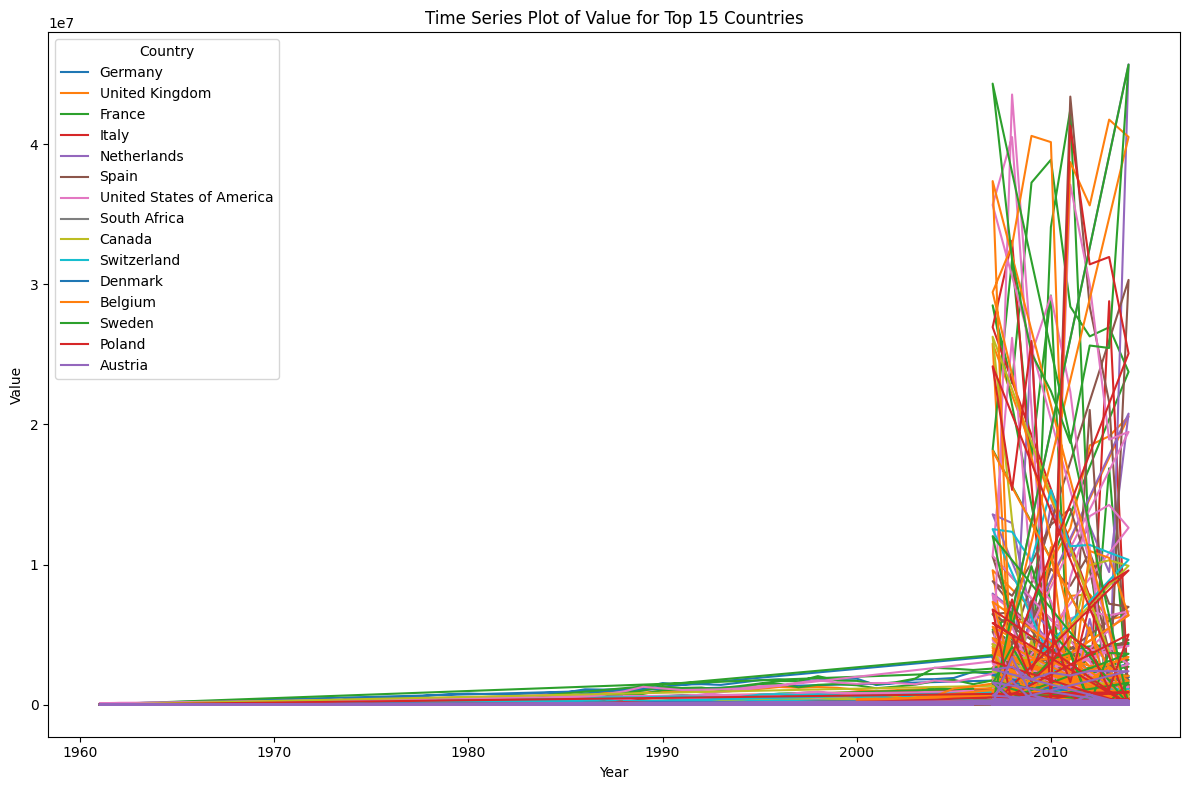

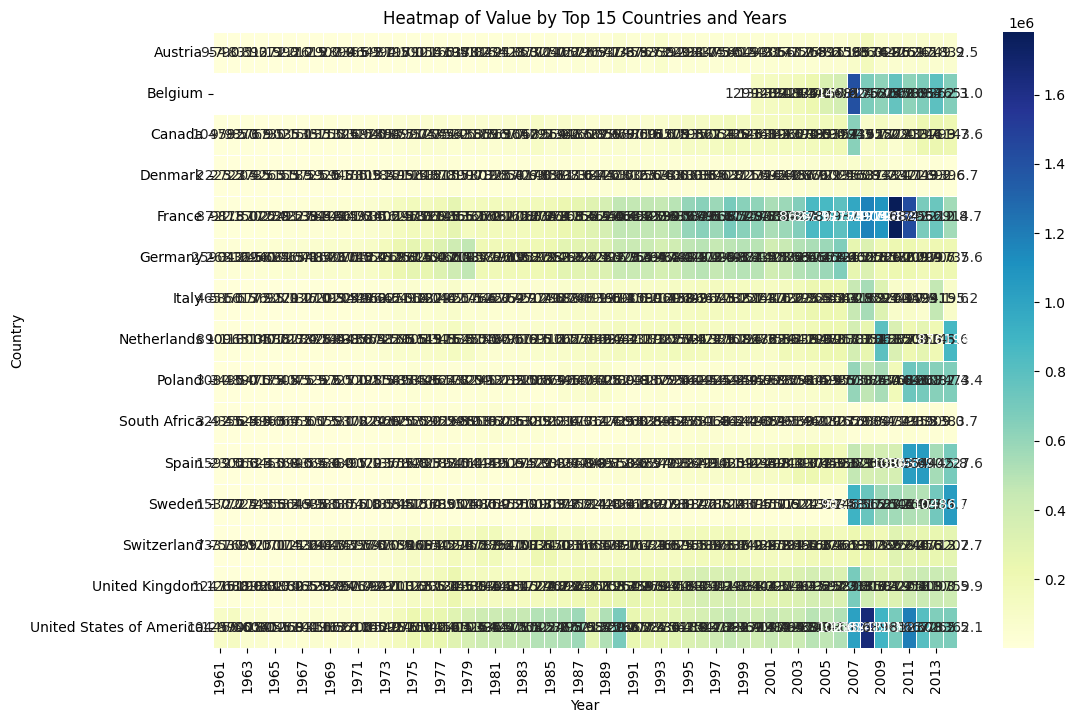

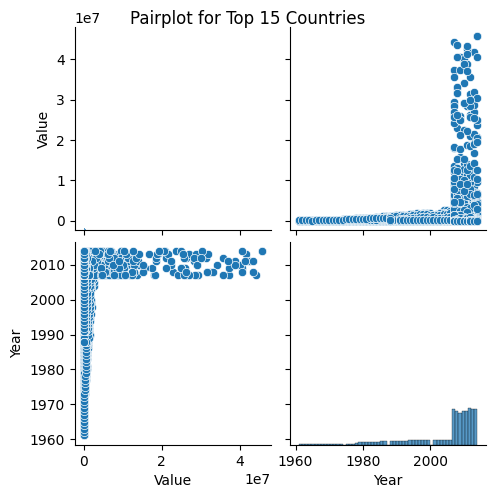

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Calculate the top 15 countries based on frequency
top_countries = df['Country'].value_counts().head(15).index

# Subset the DataFrame for top 15 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Bar chart of top 15 countries
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df_top_countries, order=top_countries)
plt.xticks(rotation=45)
plt.title('Bar Chart of Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

# Box plots by Item for top 15 countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='Item', y='Value', data=df_top_countries, hue='Country')
plt.xticks(rotation=45)
plt.title('Box Plots of Value by Item for Top 15 Countries')
plt.xlabel('Item')
plt.ylabel('Value')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Time series plots for top 15 countries
plt.figure(figsize=(12, 8))
for country in top_countries:
    country_data = df_top_countries[df_top_countries['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)
plt.title('Time Series Plot of Value for Top 15 Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# Heatmap of Value by top 15 countries and years
pivot_table = df_top_countries.pivot_table(values='Value', index='Country', columns='Year')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Value by Top 15 Countries and Years')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

# Pairplot for top 15 countries
sns.pairplot(data=df_top_countries, vars=['Value', 'Year'])
plt.suptitle('Pairplot for Top 15 Countries')
plt.show()


In [51]:
pip install dash plotly pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [54]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Calculate the top 10 countries based on frequency
top_countries = df['Country'].value_counts().head(10).index

# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1("Top 10 Countries Data Visualization Dashboard"),

    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='box-plot'),
    dcc.Graph(id='time-series'),
    dcc.Graph(id='heatmap'),
    dcc.Graph(id='pairplot'),

    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in top_countries],
        value=top_countries[0]
    )
])

# Define callback for updating visualizations
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('box-plot', 'figure'),
     Output('time-series', 'figure'),
     Output('heatmap', 'figure'),
     Output('pairplot', 'figure')],
    [Input('country-dropdown', 'value')]
)
def update_visualizations(selected_country):
    # Create bar chart
    bar_chart = px.bar(df[df['Country'] == selected_country], x='Country', y='Value')

    # Create box plot
    box_plot = px.box(df[df['Country'] == selected_country], x='Country', y='Value')

    # Create time series plot
    time_series = px.line(df[df['Country'] == selected_country], x='Year', y='Value')

    # Create heatmap
    pivot_table = df[df['Country'].isin(top_countries)].pivot_table(values='Value', index='Country', columns='Year')
    heatmap = px.imshow(pivot_table)

    # Create pairplot
    pairplot = px.scatter_matrix(df[df['Country'] == selected_country], dimensions=['Value', 'Year'])

    return bar_chart, box_plot, time_series, heatmap, pairplot

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

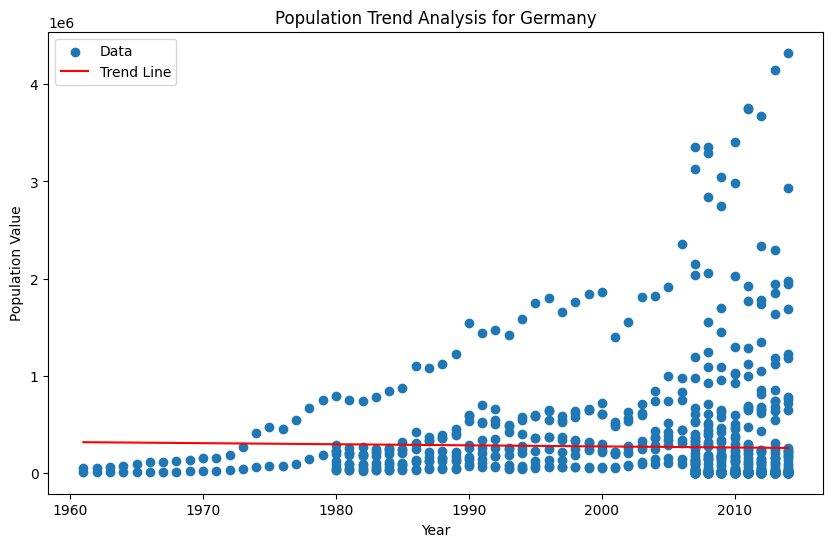

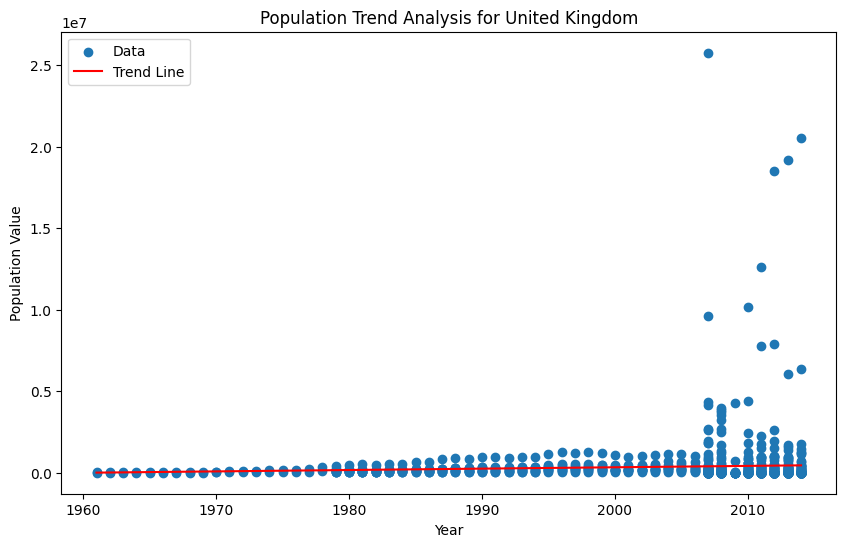

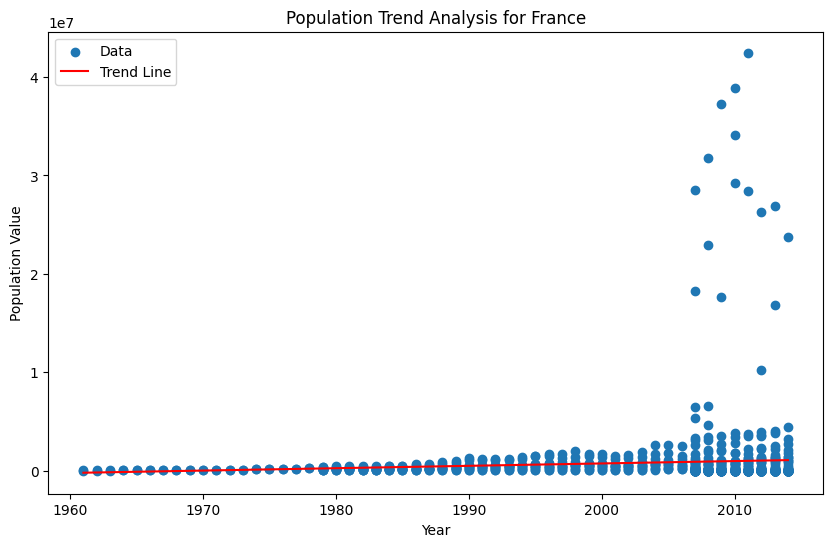

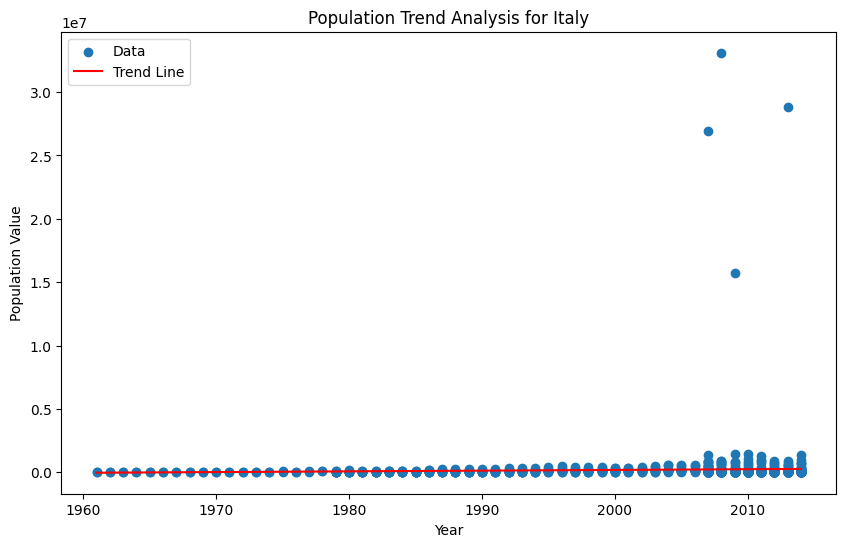

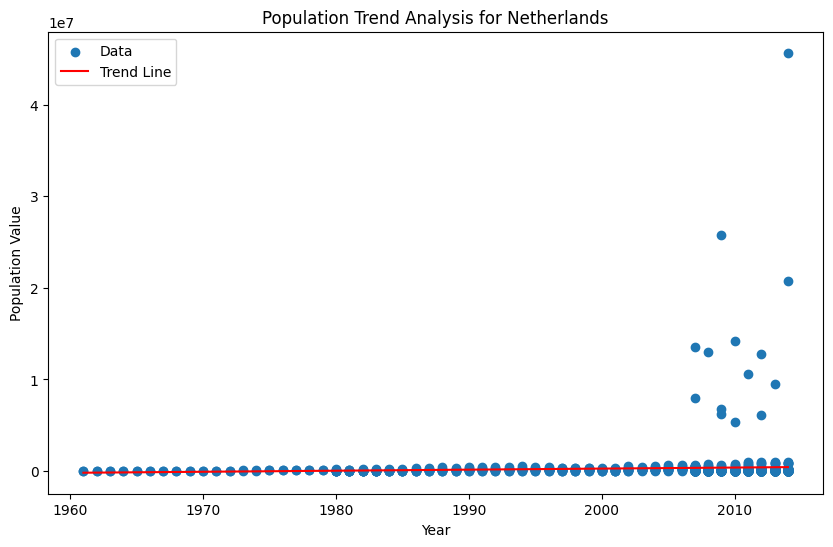

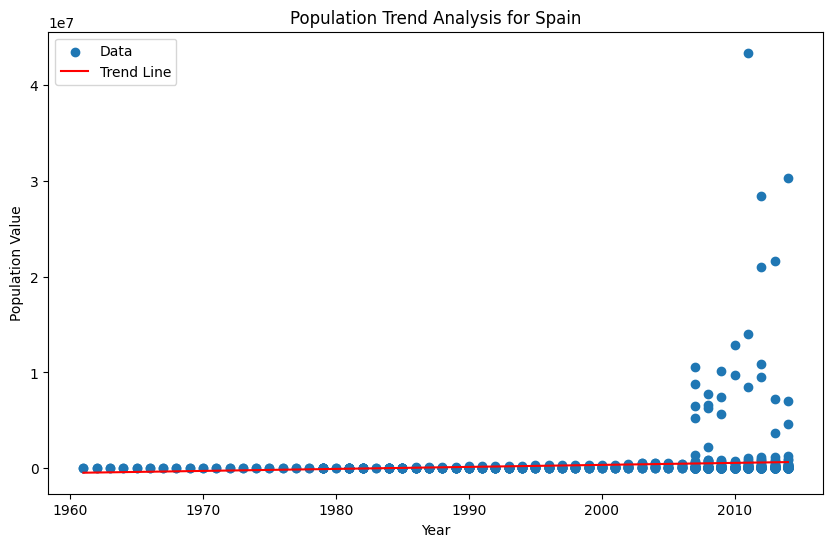

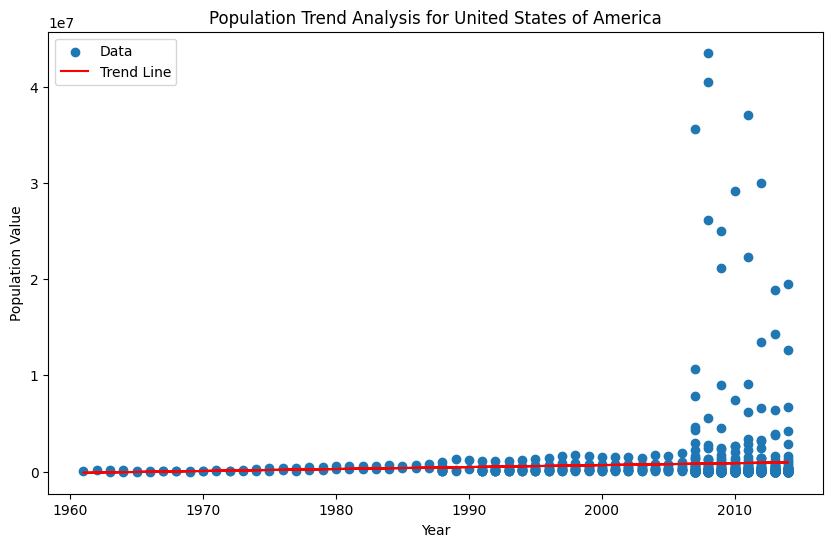

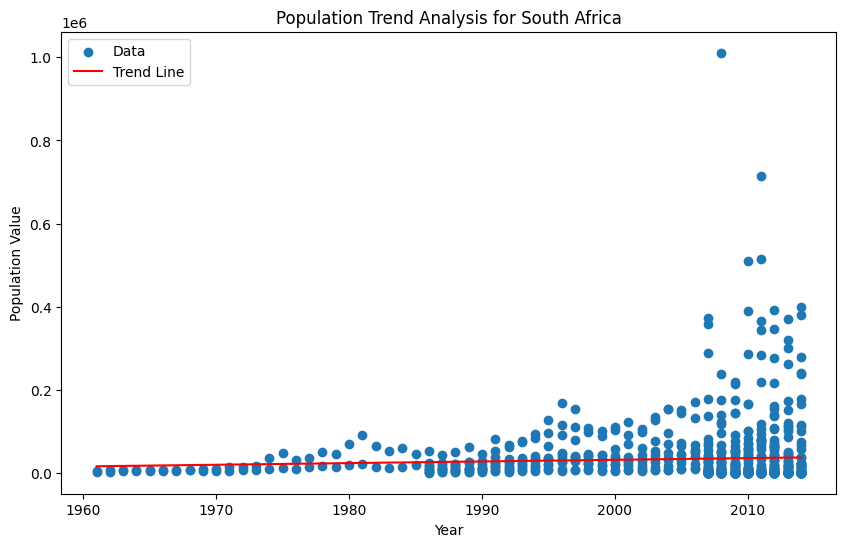

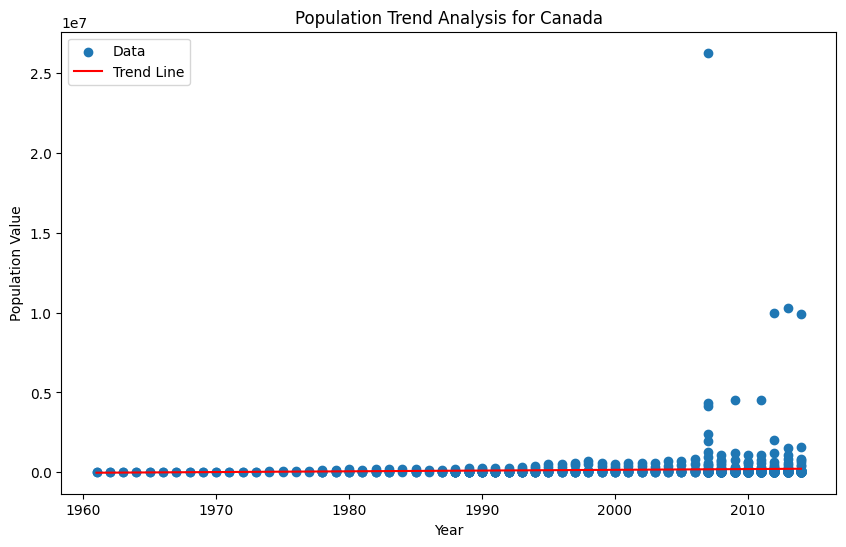

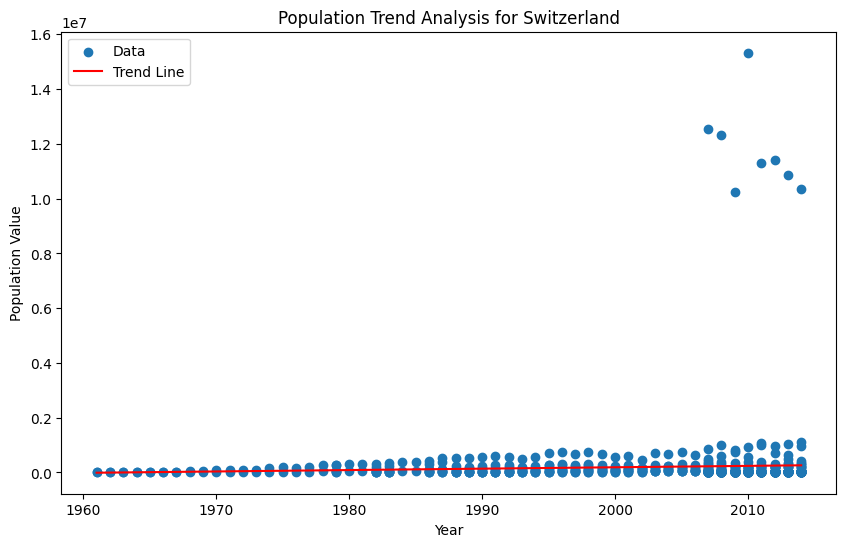

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Top 10 countries based on frequency
top_countries = df['Country'].value_counts().head(10).index

# Define a function to perform trend analysis
def perform_trend_analysis(df, countries):
    trend_results = {}

    for country in countries:
        country_data = df[df['Country'] == country]

        # Calculate the linear regression line
        trend = np.polyfit(country_data['Year'], country_data['Value'], 1)
        trend_line = np.polyval(trend, country_data['Year'])

        trend_results[country] = {'slope': trend[0], 'intercept': trend[1]}

        # Plot the data and trend line
        plt.figure(figsize=(10, 6))
        plt.scatter(country_data['Year'], country_data['Value'], label='Data')
        plt.plot(country_data['Year'], trend_line, color='red', label='Trend Line')
        plt.xlabel('Year')
        plt.ylabel('Population Value')
        plt.title(f'Population Trend Analysis for {country}')
        plt.legend()
        plt.show()

    return trend_results

# Perform trend analysis for Research Question 1
trend_results = perform_trend_analysis(df, top_countries)


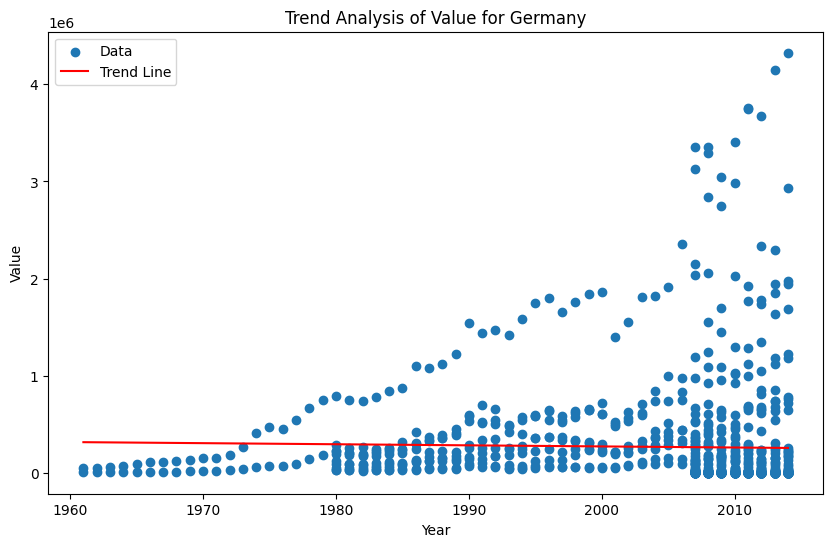

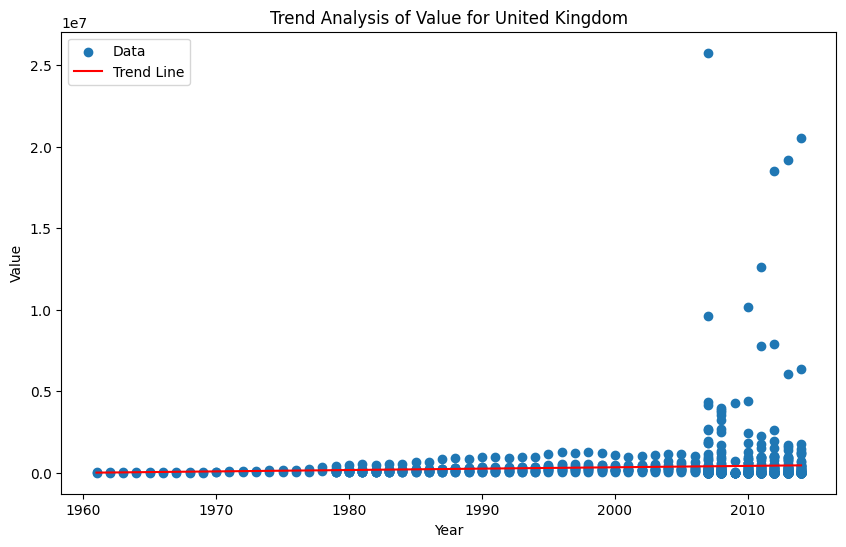

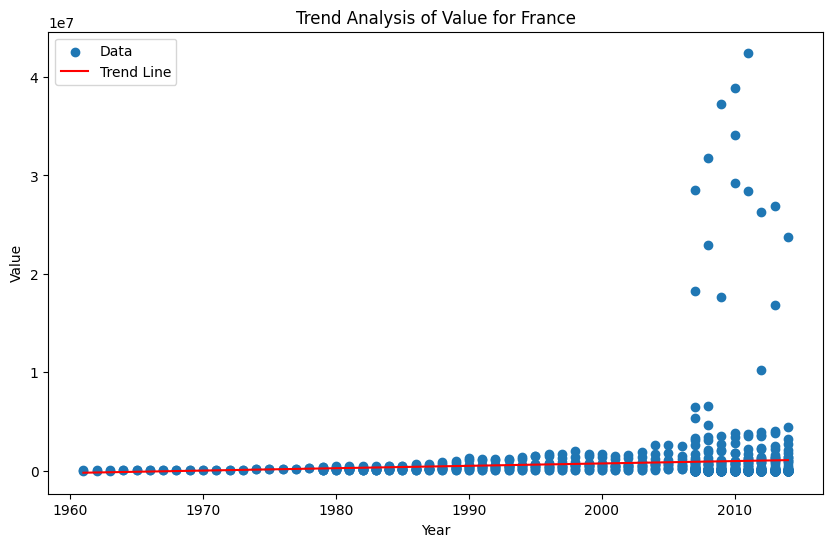

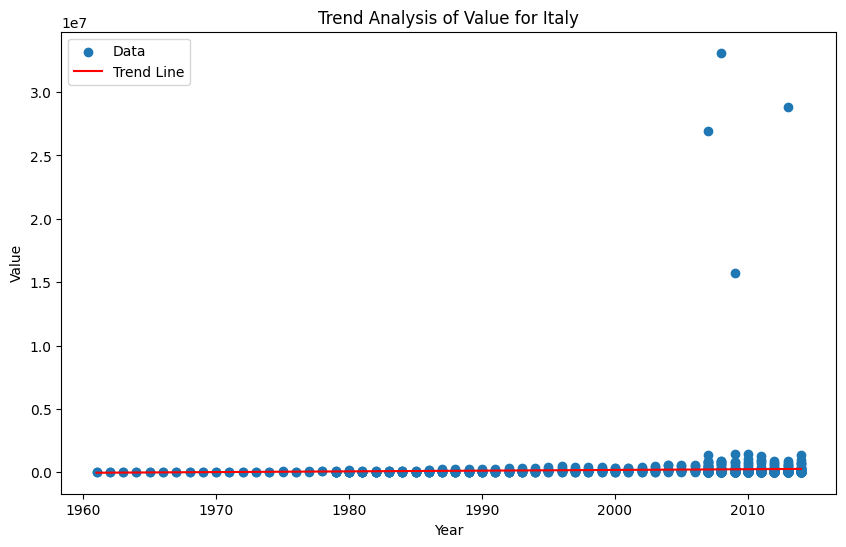

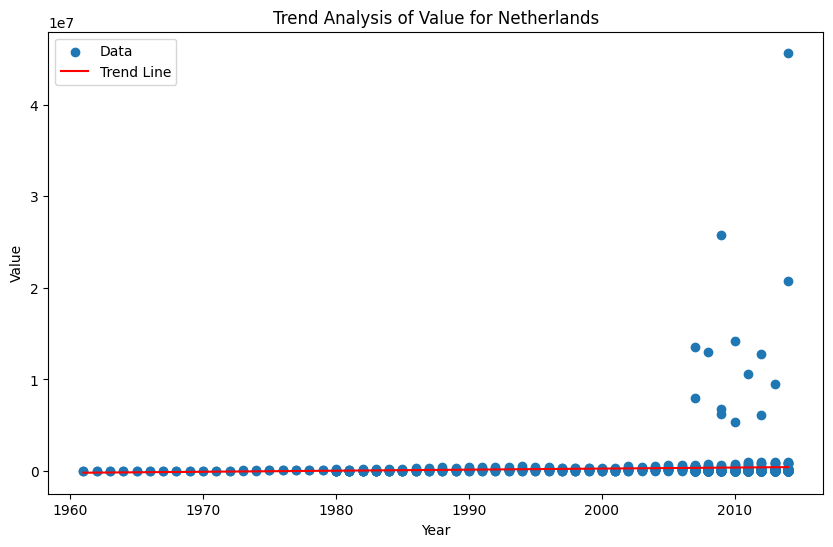

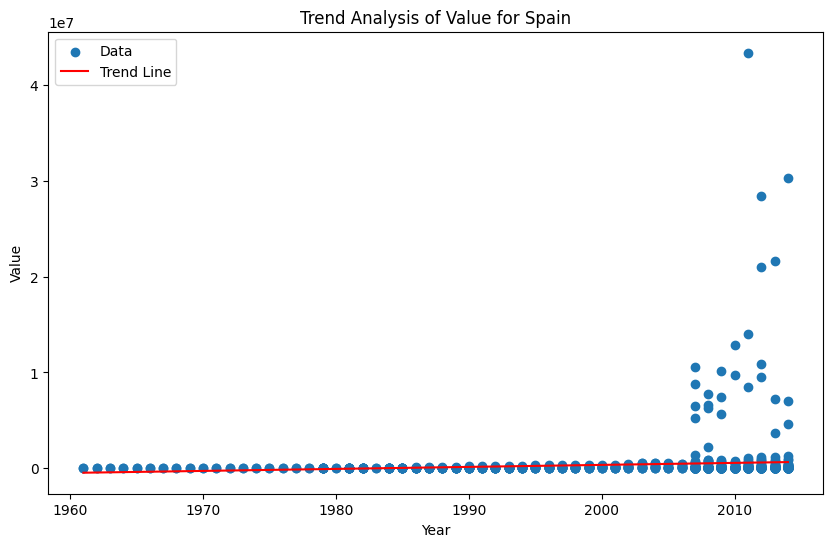

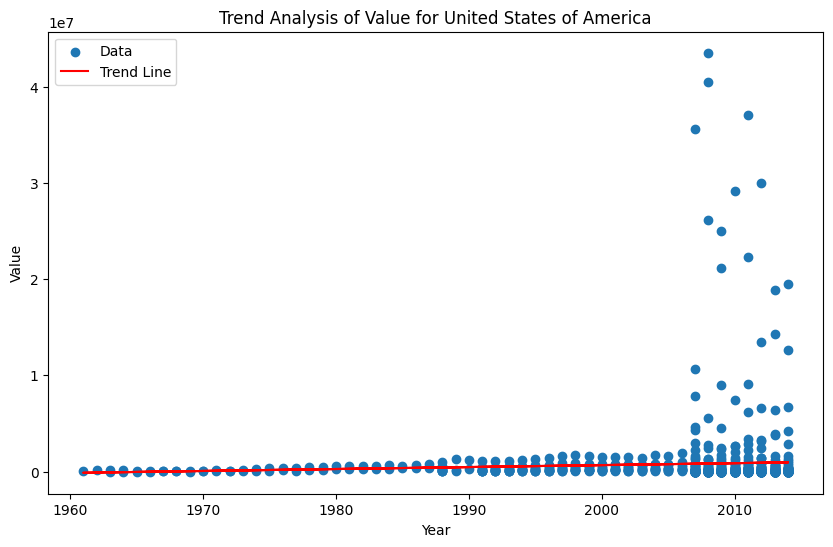

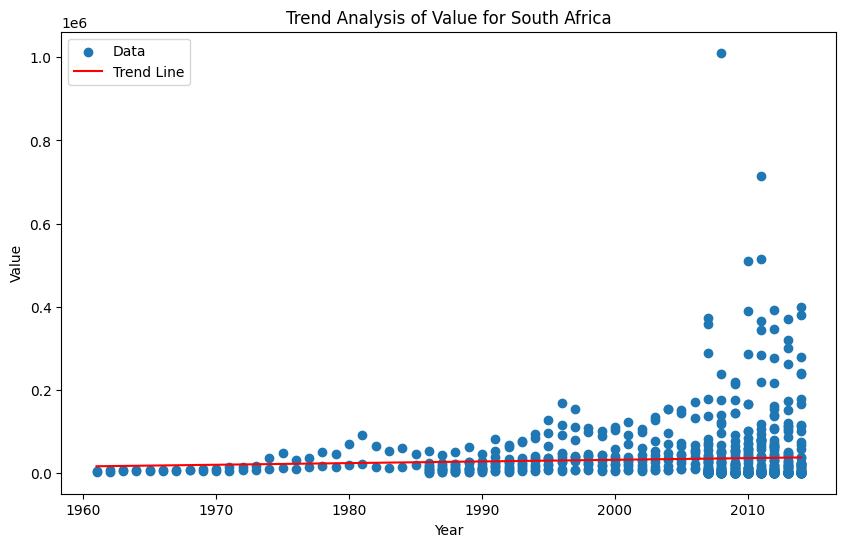

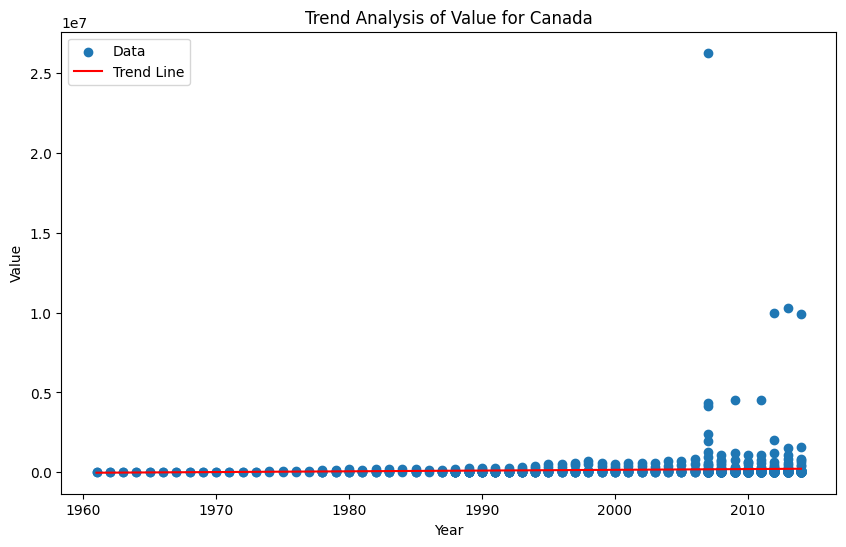

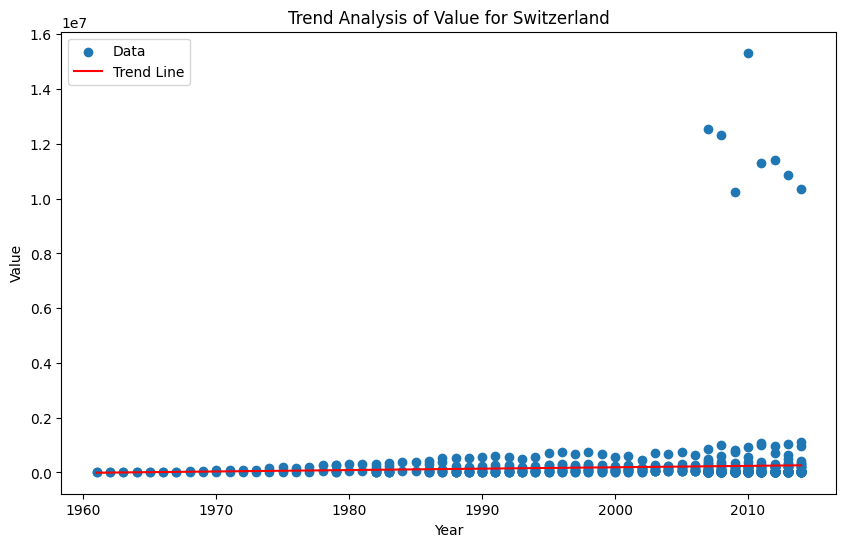

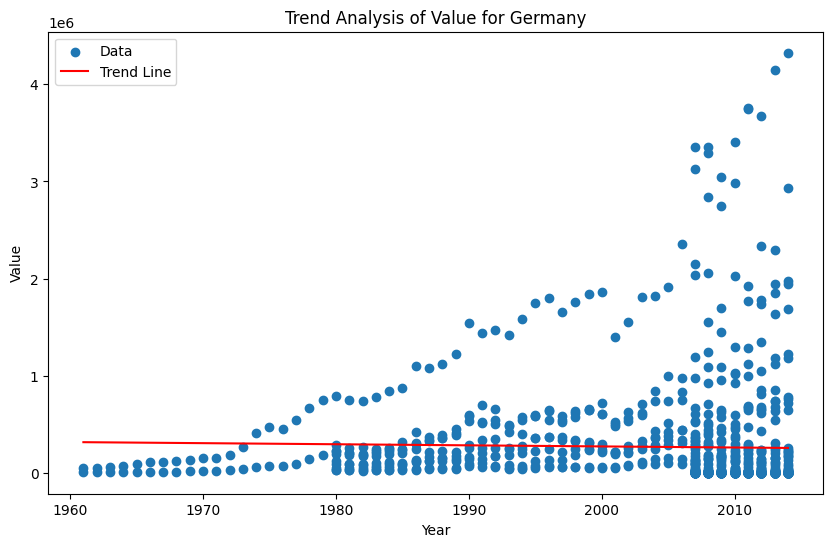

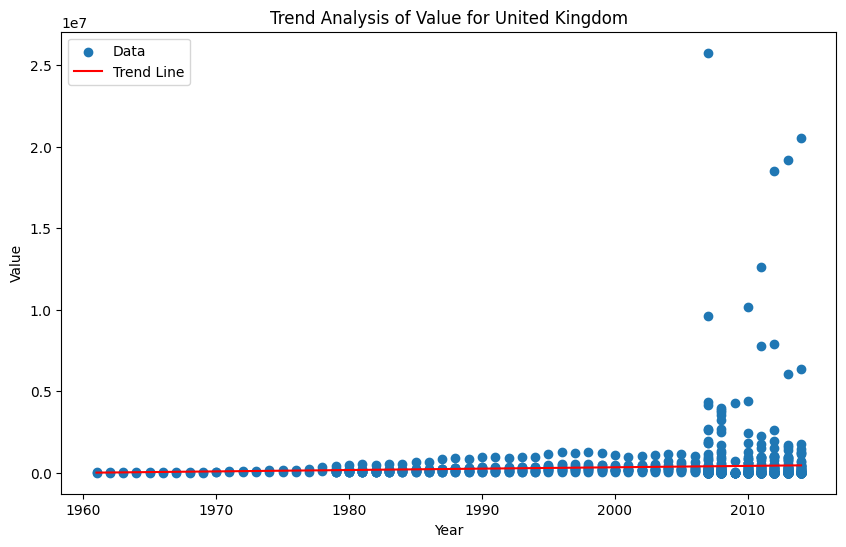

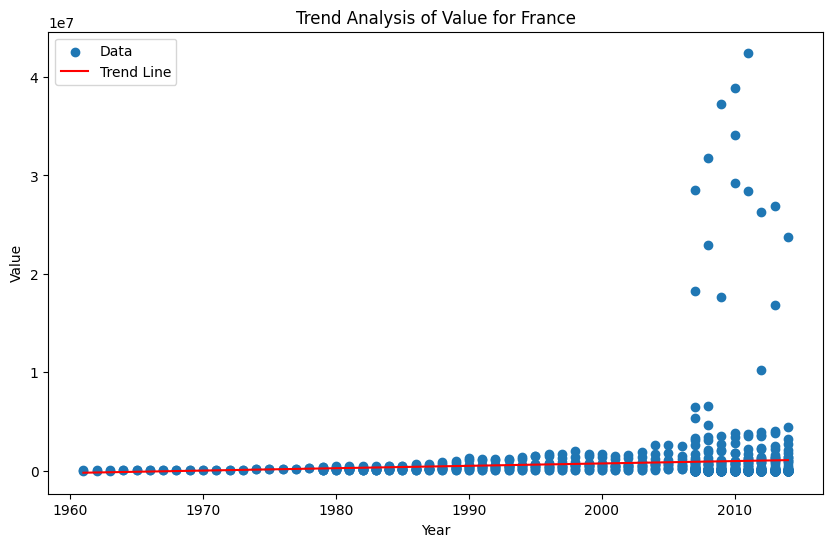

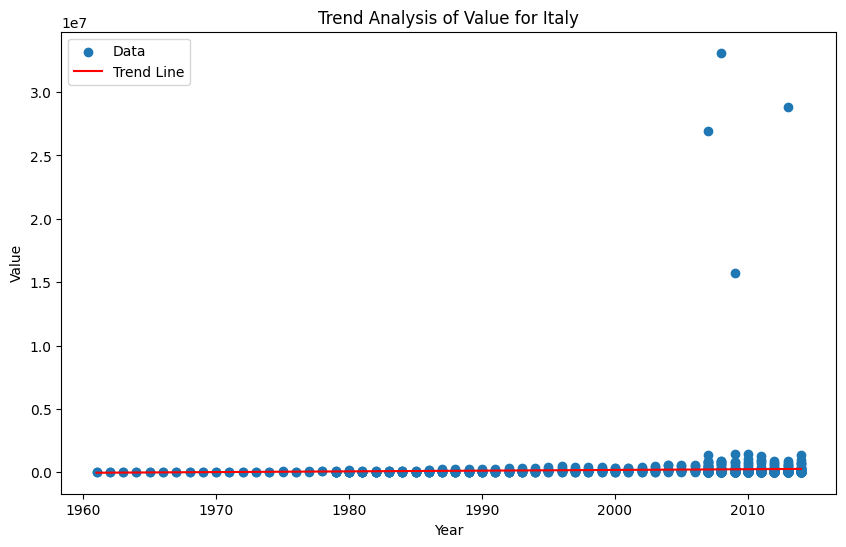

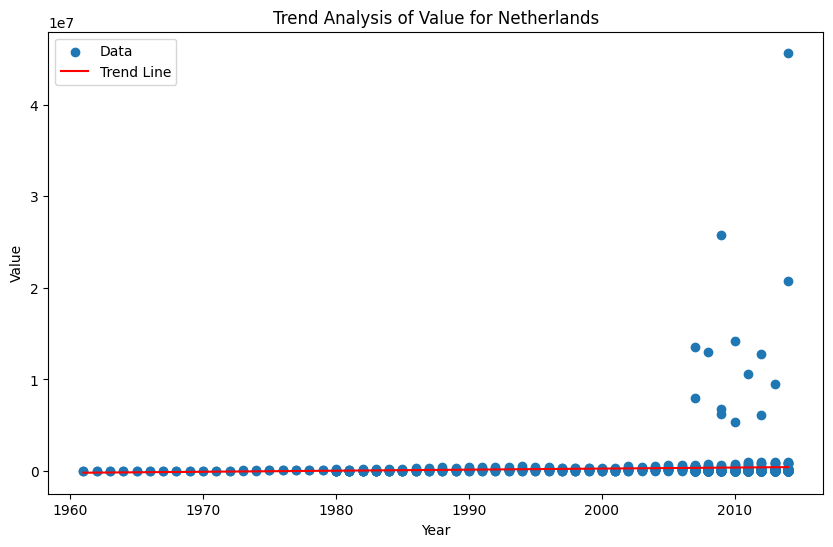

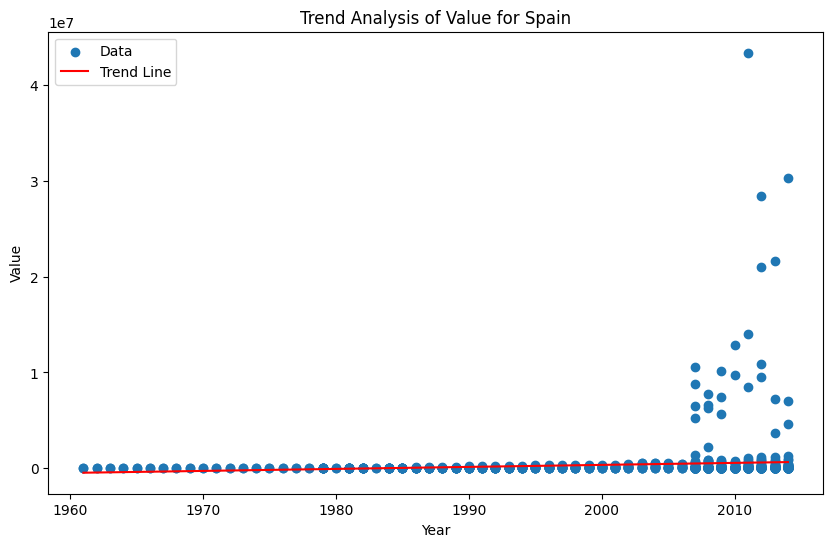

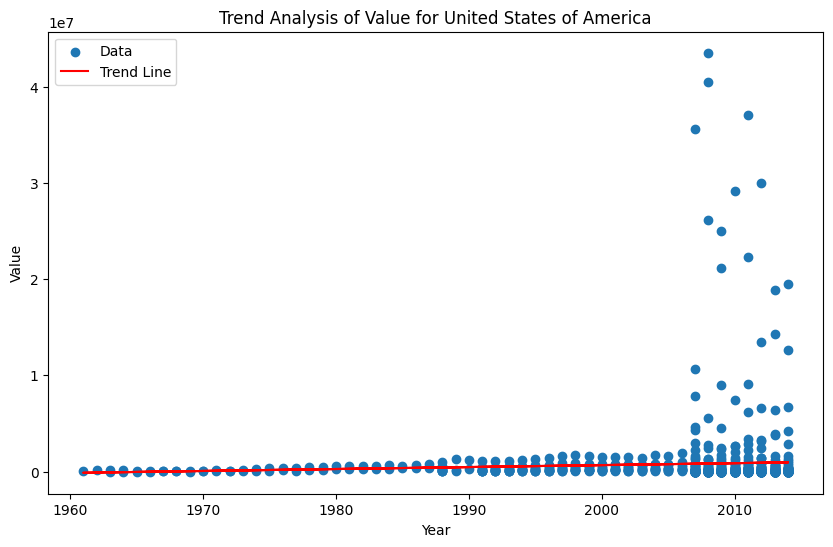

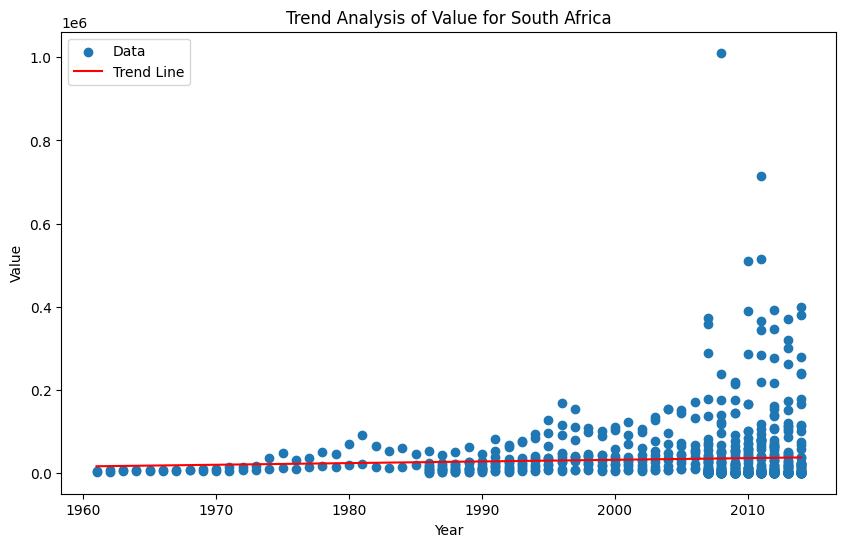

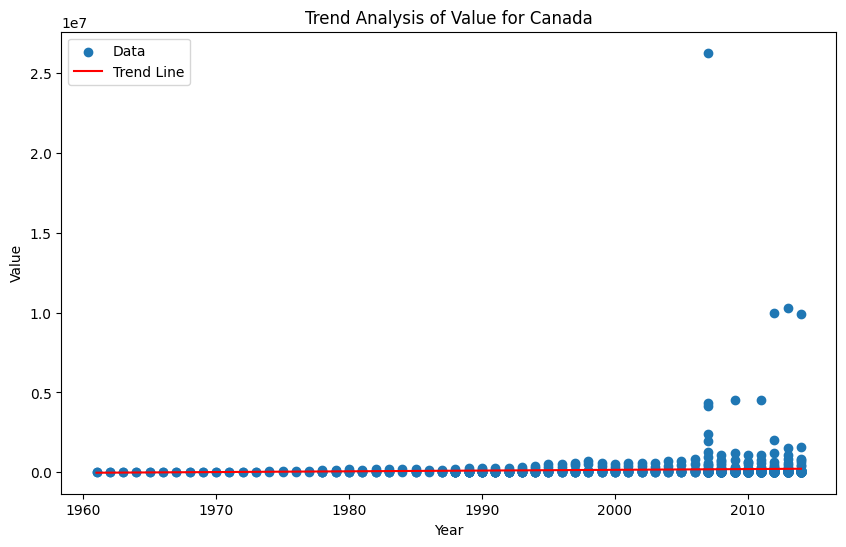

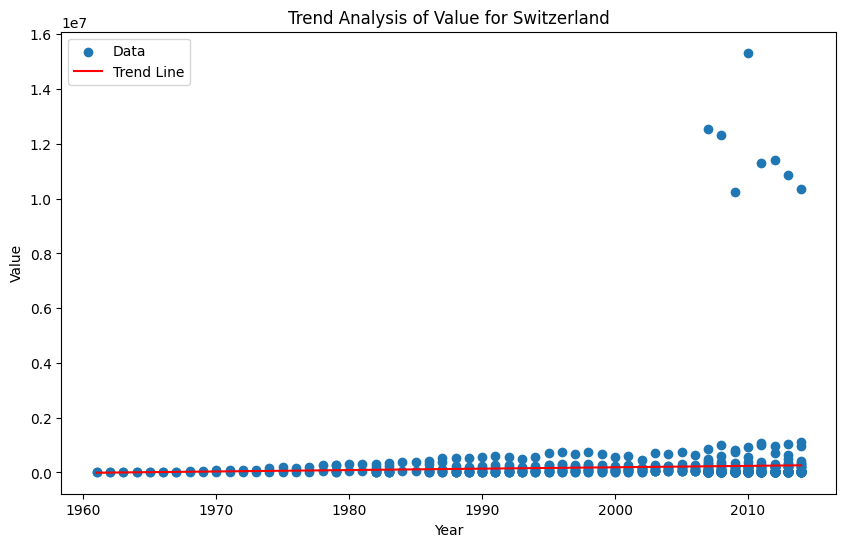

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Top 10 countries based on frequency
top_countries = df['Country'].value_counts().head(10).index

# Define a function to perform trend analysis
def perform_trend_analysis(df, countries):
    trend_results = {}

    for country in countries:
        country_data = df[df['Country'] == country]

        # Calculate the linear regression line for 'Value' over time
        trend = np.polyfit(country_data['Year'], country_data['Value'], 1)
        trend_line = np.polyval(trend, country_data['Year'])

        trend_results[country] = {'slope': trend[0], 'intercept': trend[1]}

        # Plot the data and trend line
        plt.figure(figsize=(10, 6))
        plt.scatter(country_data['Year'], country_data['Value'], label='Data')
        plt.plot(country_data['Year'], trend_line, color='red', label='Trend Line')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.title(f'Trend Analysis of Value for {country}')
        plt.legend()
        plt.show()

    return trend_results

# Perform trend analysis for Research Question 2
trend_results = perform_trend_analysis(df, top_countries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Top 10 countries based on frequency
top_countries = df['Country'].value_counts().head(10).index

# Define a function to perform trend analysis
def perform_trend_analysis(df, countries):
    trend_results = {}

    for country in countries:
        country_data = df[df['Country'] == country]

        # Calculate the linear regression line for 'Value' over time
        trend = np.polyfit(country_data['Year'], country_data['Value'], 1)
        trend_line = np.polyval(trend, country_data['Year'])

        trend_results[country] = {'slope': trend[0], 'intercept': trend[1]}

        # Plot the data and trend line
        plt.figure(figsize=(10, 6))
        plt.scatter(country_data['Year'], country_data['Value'], label='Data')
        plt.plot(country_data['Year'], trend_line, color='red', label='Trend Line')
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.title(f'Trend Analysis of Value for {country}')
        plt.legend()
        plt.show()

    return trend_results

# Perform trend analysis for Research Question 2
trend_results = perform_trend_analysis(df, top_countries)


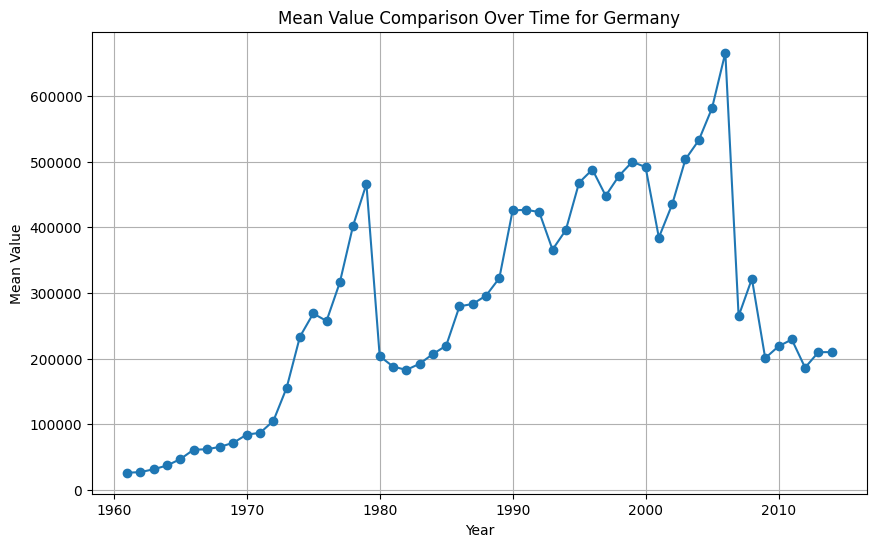

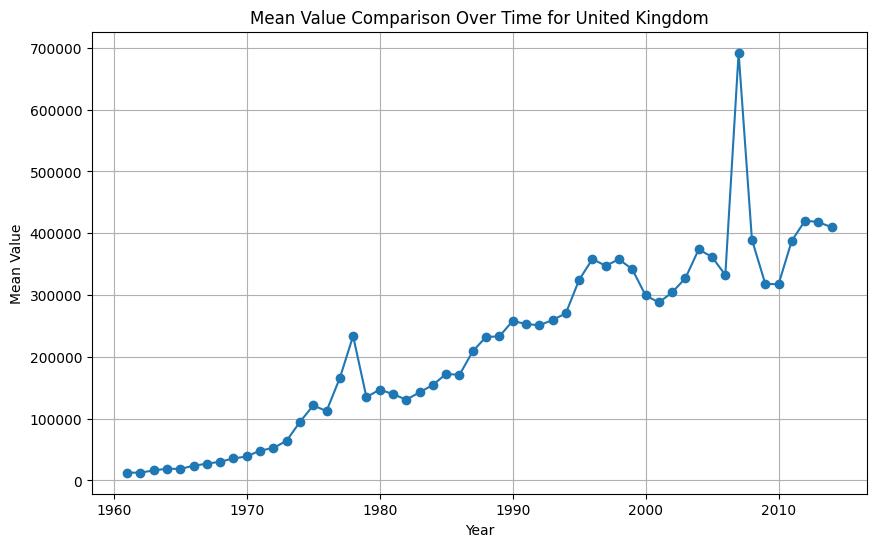

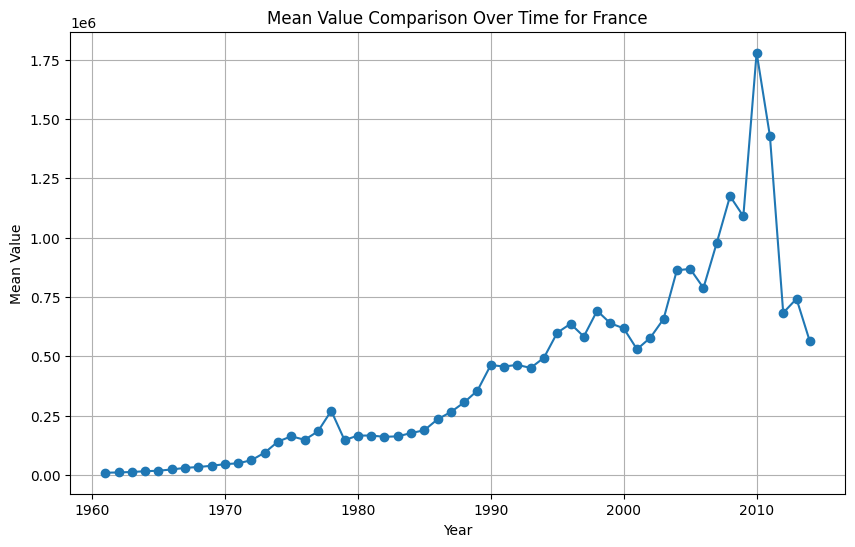

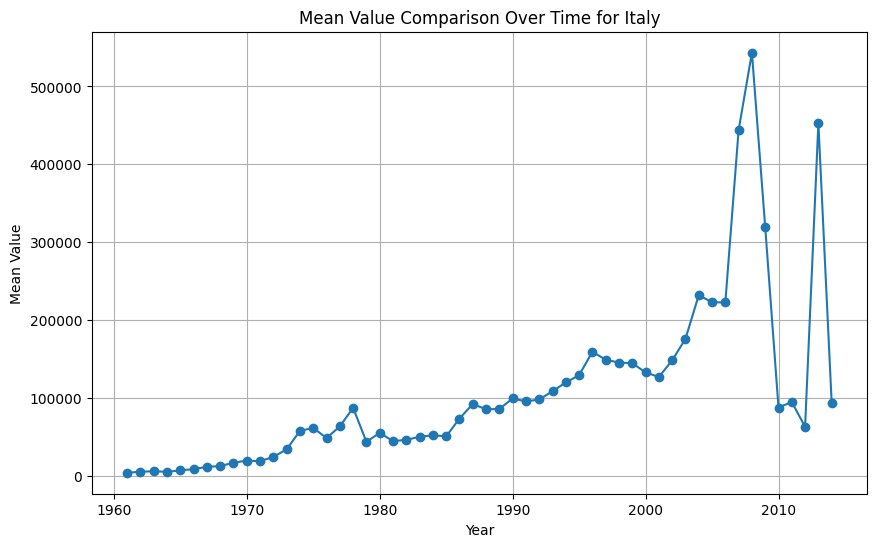

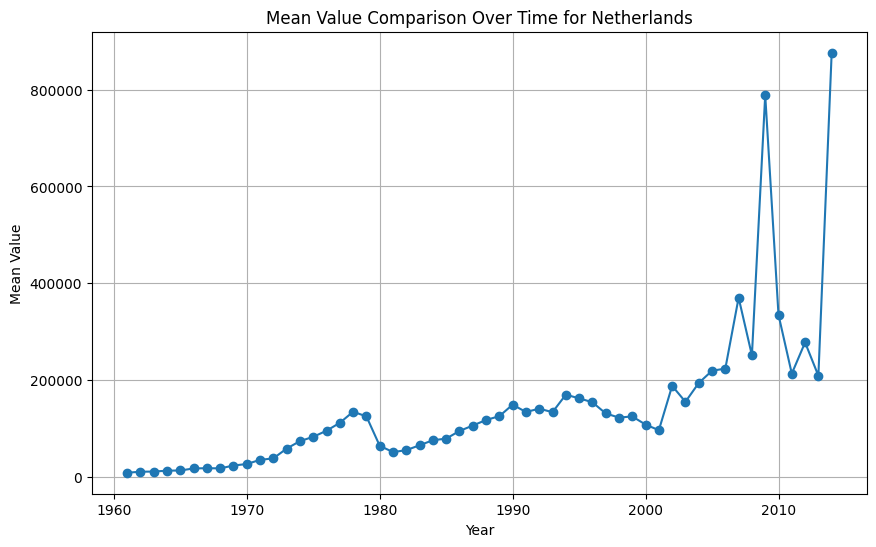

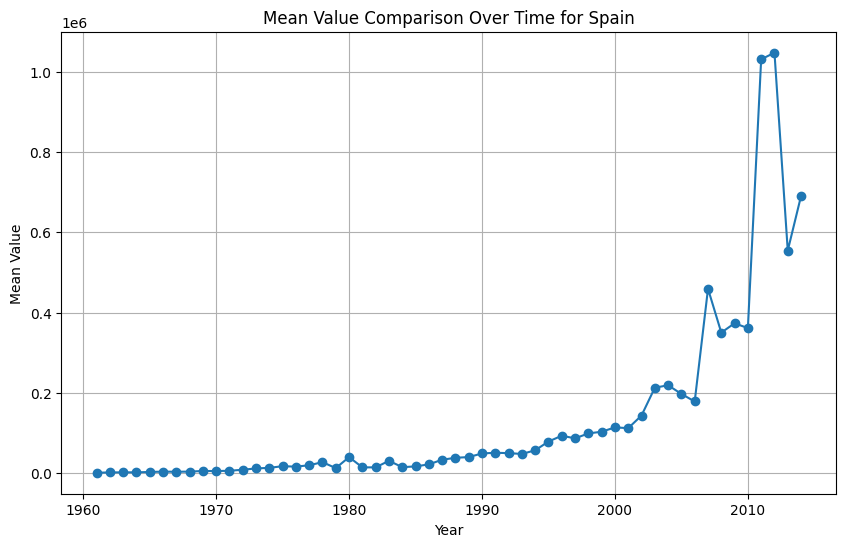

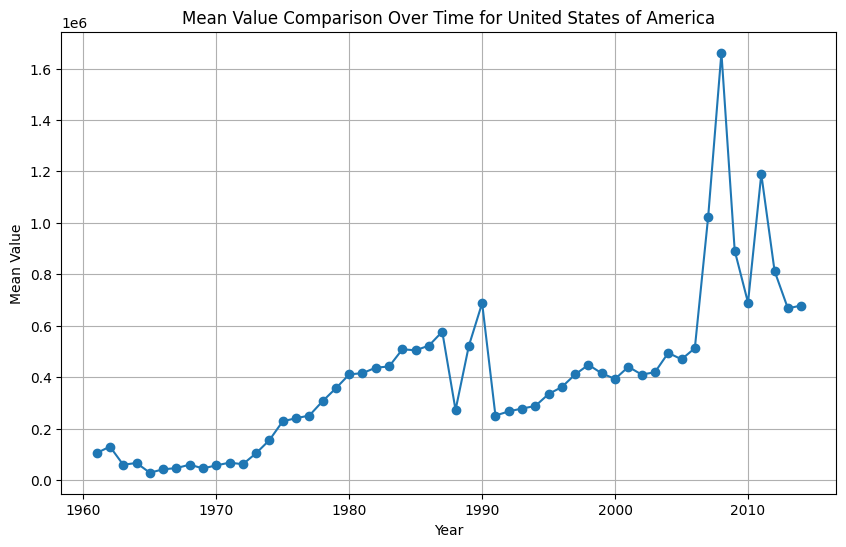

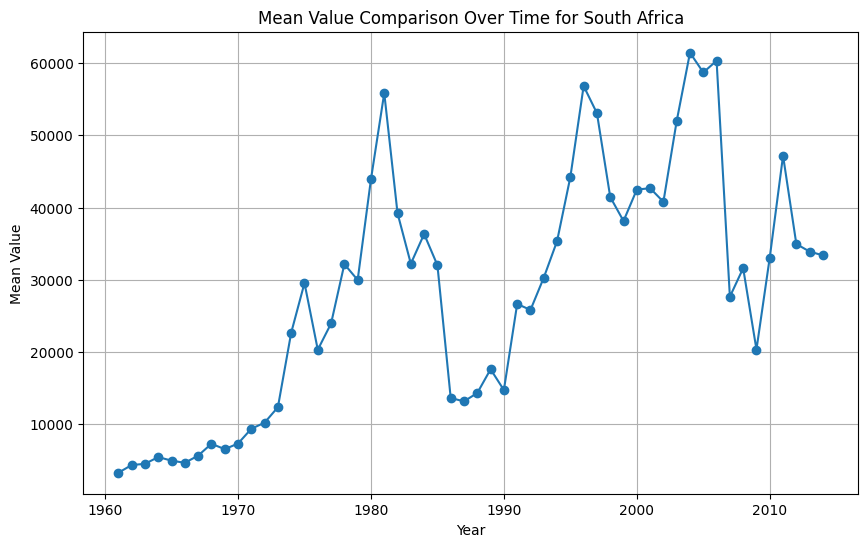

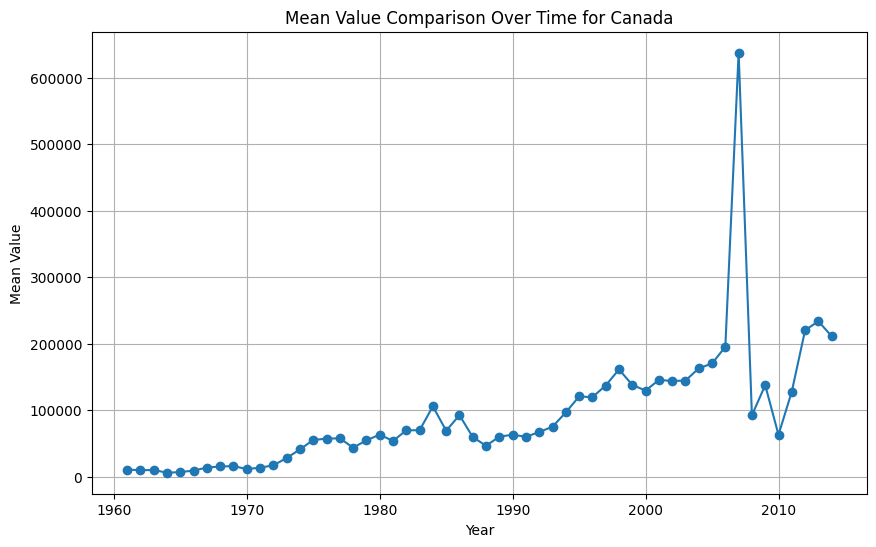

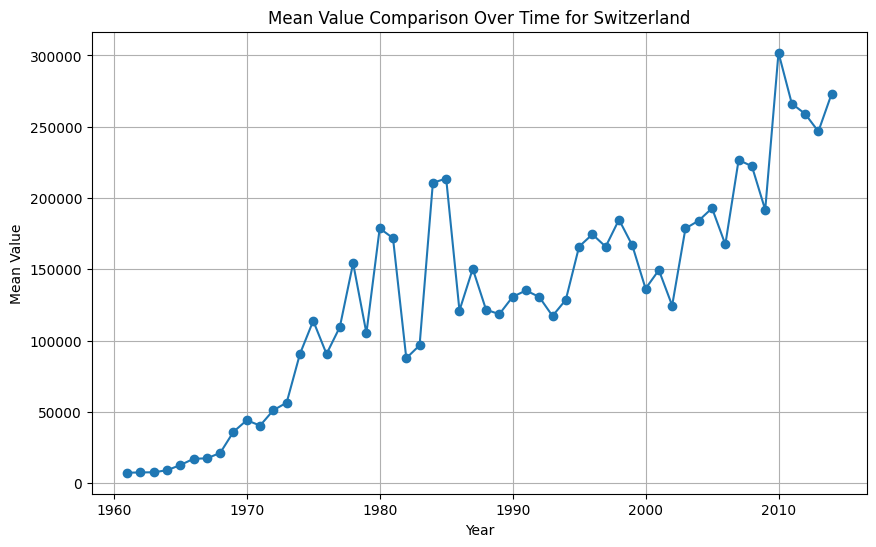

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Top 10 countries based on frequency
top_countries = df['Country'].value_counts().head(10).index

# Define a function to perform mean value comparison over time
def compare_mean_value_over_time(df, countries):
    for country in countries:
        country_data = df[df['Country'] == country]

        # Calculate the mean 'Value' for each year
        mean_values = country_data.groupby('Year')['Value'].mean()

        # Plot the mean values over time
        plt.figure(figsize=(10, 6))
        plt.plot(mean_values.index, mean_values.values, marker='o')
        plt.xlabel('Year')
        plt.ylabel('Mean Value')
        plt.title(f'Mean Value Comparison Over Time for {country}')
        plt.grid(True)
        plt.show()

# Compare mean value over time for each of the top countries
compare_mean_value_over_time(df, top_countries)


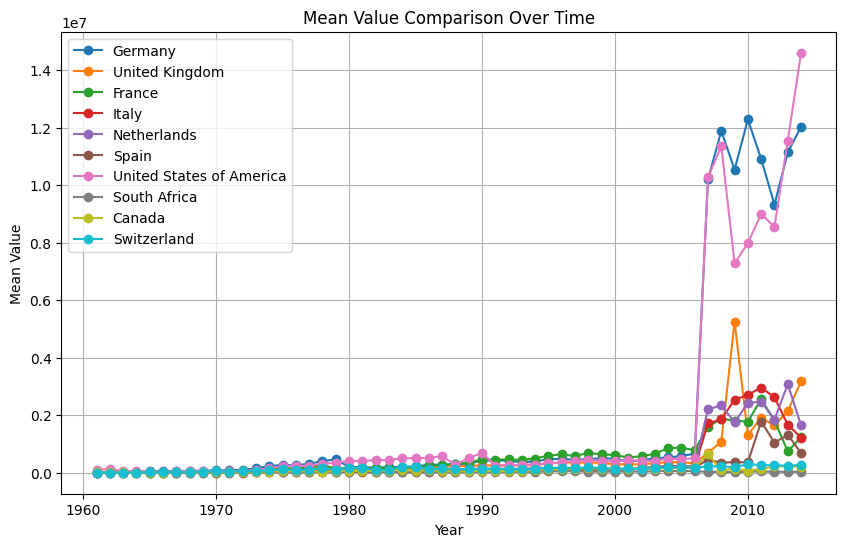

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Top 10 countries based on frequency
top_countries = df['Country'].value_counts().head(10).index

# Create a plot to compare mean value over time for multiple countries
plt.figure(figsize=(10, 6))

for country in top_countries:
    country_data = df[df['Country'] == country]

    # Calculate the mean 'Value' for each year
    mean_values = country_data.groupby('Year')['Value'].mean()

    # Plot the mean values over time for each country
    plt.plot(mean_values.index, mean_values.values, marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Value Comparison Over Time')
plt.legend()
plt.grid(True)
plt.show()


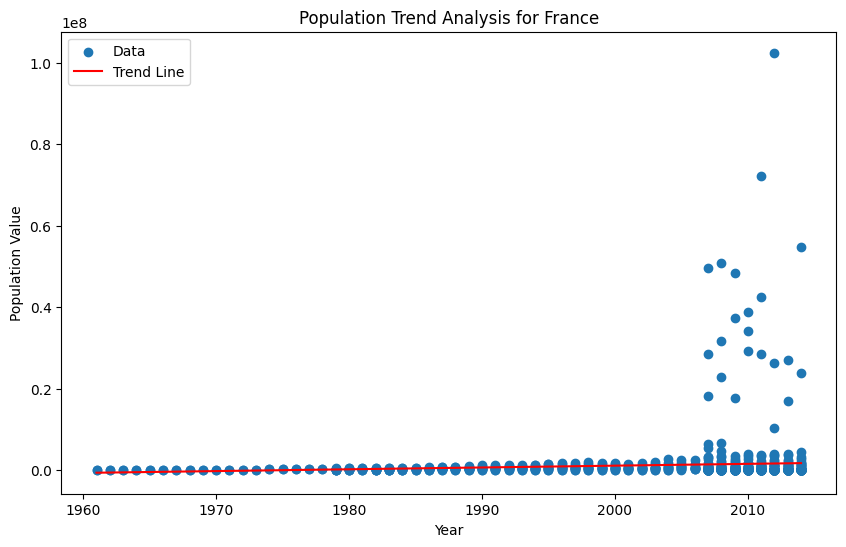

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Select a specific country for analysis
country = 'France'
country_data = df[df['Country'] == country]

if len(country_data) == 0:
    print(f"No data available for {country}")
else:
    # Perform linear regression for time series trend
    X = country_data[['Year']]
    y = country_data['Value']
    regressor = LinearRegression()
    regressor.fit(X, y)
    trend_line = regressor.predict(X)

    # Plot the data and trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Data')
    plt.plot(X, trend_line, color='red', label='Trend Line')
    plt.xlabel('Year')
    plt.ylabel('Population Value')
    plt.title(f'Population Trend Analysis for {country}')
    plt.legend()
    plt.show()


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Define the features (X) and target (y)
X = df.drop(columns=['Value'])  # Replace with actual feature columns
y = df['Value']  # Replace with actual target column

# Split the dataset into training and validation sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (57228, 10)
X_val shape: (14307, 10)
y_train shape: (57228,)
y_val shape: (14307,)


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Convert categorical variables to one-hot encoded columns
X = pd.get_dummies(df.drop(columns=['Value']))  # Replace with actual feature columns
y = df['Value']  # Replace with actual target column

# Split the dataset into training and validation sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the selected model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 225317486773466.38
R-squared: 0.08101281040671604


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# df = pd.read_csv("df_dataset.csv")

# Convert categorical variables to one-hot encoded columns
X = pd.get_dummies(df.drop(columns=['Value']))  # Replace with actual feature columns
y = df['Value']  # Replace with actual target column

# Split the dataset into training and validation sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Interpret model coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

# Interpret model predictions
for i in range(5):  # Print predictions for the first 5 examples
    print(f"Prediction: {y_pred[i]}, Actual: {y_val.iloc[i]}")


Mean Squared Error: 225317486773466.38
R-squared: 0.08101281040671604
          Feature   Coefficient
0    Country Code -3.870808e+11
1       Item Code -4.179224e+04
2    Element Code  5.165645e+03
3       Year Code  1.083694e+04
4            Year  1.084500e+04
..            ...           ...
300       Flag_Fc -2.817790e+14
301       Flag_Fm -2.817790e+14
302        Flag_I -2.817790e+14
303        Flag_W -2.817790e+14
304        Flag_w -2.817790e+14

[305 rows x 2 columns]
Prediction: -369694.4375, Actual: 250.0
Prediction: 572100.1875, Actual: 231197.0
Prediction: -1299868.125, Actual: 1213.0
Prediction: -77560.125, Actual: 106912.65
Prediction: -608606.375, Actual: 1043.0
